## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

**The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

**All other cases:** All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

### Importing the libraries


In [224]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

#import the useful libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd, seaborn as sns
%matplotlib inline

## 1. Data Cleaning 

In [225]:
#Reading Application Data
appData=pd.read_csv("application_data.csv")
appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
#Reading Previous application data
prevApp=pd.read_csv("previous_application.csv")
prevApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [227]:
#Viewing Column Descriptions
#colDesc=pd.read_csv('columns_description.csv')
#colDesc.head(100)

In [228]:
#Dropping unecessary columns in Application Data since their description did not indicate that they would be useful
appData.drop(appData.iloc[:, 31:124], inplace=True, axis=1)
appData.drop(appData.iloc[:, 19:28], inplace=True, axis=1)
appData.drop(appData.iloc[:, 16:17], inplace=True, axis=1)
appData.drop(appData.iloc[:, 10:12], inplace=True, axis=1)




In [229]:
appData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Laborers,1.0,2
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,-16765,-1188,Core staff,2.0,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Laborers,1.0,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,2


In [230]:
#Size of Application Data
appData.shape

(307511, 19)

In [231]:
#Dropping unecessary columns in Previous Applications since their description did not indicate that they would be useful
prevApp.drop(prevApp.iloc[:, 22:38], inplace=True, axis=1)
prevApp.drop(prevApp.iloc[:, 17:21], inplace=True, axis=1)
prevApp.drop(prevApp.iloc[:, 7:15], inplace=True, axis=1)

In [232]:
prevApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,XAP,Approved,Repeater
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,XNA,Approved,Repeater
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,XNA,Approved,Repeater
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,XNA,Approved,Repeater
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,Repairs,Refused,Repeater


### 1.1 Cleaning Application Data


In [233]:
#print the information of variables to check their data types.
appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            307511 non-null  int64  
 1   TARGET                307511 non-null  int64  
 2   NAME_CONTRACT_TYPE    307511 non-null  object 
 3   CODE_GENDER           307511 non-null  object 
 4   FLAG_OWN_CAR          307511 non-null  object 
 5   FLAG_OWN_REALTY       307511 non-null  object 
 6   CNT_CHILDREN          307511 non-null  int64  
 7   AMT_INCOME_TOTAL      307511 non-null  float64
 8   AMT_CREDIT            307511 non-null  float64
 9   AMT_ANNUITY           307499 non-null  float64
 10  NAME_INCOME_TYPE      307511 non-null  object 
 11  NAME_EDUCATION_TYPE   307511 non-null  object 
 12  NAME_FAMILY_STATUS    307511 non-null  object 
 13  NAME_HOUSING_TYPE     307511 non-null  object 
 14  DAYS_BIRTH            307511 non-null  int64  
 15  

In [234]:
#Checking for null values
appData.isna().sum()


SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
AMT_CREDIT                  0
AMT_ANNUITY                12
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
OCCUPATION_TYPE         96391
CNT_FAM_MEMBERS             2
REGION_RATING_CLIENT        0
dtype: int64

In [235]:
#Analyzing null values for amount of annuity
appData[appData.AMT_ANNUITY.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,High skill tech staff,1.0,2
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,Laborers,2.0,2
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,Cooking staff,2.0,1
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,State servant,Higher education,Married,House / apartment,-11329,-2040,Core staff,2.0,2
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,Laborers,1.0,1
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,Drivers,1.0,2
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,Medicine staff,2.0,2
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,Secretaries,2.0,2
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,Commercial associate,Higher education,Married,House / apartment,-10151,-472,Security staff,2.0,2
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,Sales staff,2.0,1


In [236]:
#Dropping coulumns with null annuity as they are very few
appData=appData[~appData.AMT_ANNUITY.isna()]
appData.shape

(307499, 19)

In [237]:
#Analyzing null values for occupation type
appData[appData.OCCUPATION_TYPE.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,Pensioner,Secondary / secondary special,Married,House / apartment,-20099,365243,NaN,2.0,2
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,Pensioner,Secondary / secondary special,Married,House / apartment,-20417,365243,NaN,2.0,2
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24827,365243,NaN,2.0,3
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,State servant,Higher education,Single / not married,House / apartment,-9994,-1796,NaN,1.0,1
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-15280,-2668,NaN,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,Commercial associate,Higher education,Civil marriage,House / apartment,-16010,-1185,NaN,3.0,1
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23125,365243,NaN,2.0,2
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,Working,Higher education,Married,House / apartment,-20390,-5326,NaN,2.0,2
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-24384,365243,NaN,1.0,2


In [238]:
#Calculating the percentage of null values in Occupation
(96391/307511)*100

31.345545362604916

In [239]:
appData.OCCUPATION_TYPE.value_counts()

Laborers                 55184
Sales staff              32101
Core staff               27569
Managers                 21370
Drivers                  18602
High skill tech staff    11379
Accountants               9812
Medicine staff            8536
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [240]:
#Imputing null values for Occupation
appData.OCCUPATION_TYPE.fillna("None",inplace=True)

In [241]:
appData[['OCCUPATION_TYPE','NAME_INCOME_TYPE']].head(50)

,OCCUPATION_TYPE,NAME_INCOME_TYPE
0,Laborers,Working
1,Core staff,State servant
2,Laborers,Working
3,Laborers,Working
4,Core staff,Working
5,Laborers,State servant
6,Accountants,Commercial associate
7,Managers,State servant
8,None,Pensioner
9,Laborers,Working


In [242]:
appData[(appData.OCCUPATION_TYPE != "None") & (appData.NAME_INCOME_TYPE == "Pensioner")].OCCUPATION_TYPE

106630          Laborers
113694    Medicine staff
134327    Cleaning staff
242307    Cleaning staff
274863       Sales staff
Name: OCCUPATION_TYPE, dtype: object

In [243]:
#With the above data we can infer that most Pensioners have their occupation type as None, so it is better to replace all occupation type as None with Pensioners
appData['OCCUPATION_TYPE'] = appData['OCCUPATION_TYPE'].replace('None', 'Pensioner')

In [244]:
#Checking values again
appData.OCCUPATION_TYPE.value_counts()

Pensioner                96391
Laborers                 55184
Sales staff              32101
Core staff               27569
Managers                 21370
Drivers                  18602
High skill tech staff    11379
Accountants               9812
Medicine staff            8536
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [245]:
#Checking values of gender
appData.CODE_GENDER.value_counts()

F      202440
M      105055
XNA         4
Name: CODE_GENDER, dtype: int64

In [246]:
appData.CODE_GENDER.describe()

count     307499
unique         3
top            F
freq      202440
Name: CODE_GENDER, dtype: object

In [247]:
appData[appData.CODE_GENDER=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,Working,Secondary / secondary special,Married,Municipal apartment,-20232,-10044,Pensioner,2.0,3
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,Working,Secondary / secondary special,Married,House / apartment,-13717,-2797,Low-skill Laborers,4.0,2
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,Working,Higher education,Married,House / apartment,-10647,-1228,Core staff,3.0,2
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,Commercial associate,Incomplete higher,Civil marriage,House / apartment,-9649,-2293,Pensioner,2.0,2


In [248]:
#Dropping XNA values as they are a fraction in the large dataset, and the data seems be be fairly common
appData=appData[~(appData.CODE_GENDER=='XNA')]

In [249]:
##All missing values handled in Application Data 
appData.isna().sum()


SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
CNT_CHILDREN            0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY             0
NAME_INCOME_TYPE        0
NAME_EDUCATION_TYPE     0
NAME_FAMILY_STATUS      0
NAME_HOUSING_TYPE       0
DAYS_BIRTH              0
DAYS_EMPLOYED           0
OCCUPATION_TYPE         0
CNT_FAM_MEMBERS         2
REGION_RATING_CLIENT    0
dtype: int64

#### Checking values for every column


In [250]:
#A loop to check the value of all columns at once
for c in appData.columns:
    print ("\n---- %s ---" % c)
    print (appData[c].value_counts())


---- SK_ID_CURR ---
100002    1
337666    1
337662    1
337661    1
337660    1
         ..
218997    1
218996    1
218995    1
218994    1
456255    1
Name: SK_ID_CURR, Length: 307495, dtype: int64

---- TARGET ---
0    282670
1     24825
Name: TARGET, dtype: int64

---- NAME_CONTRACT_TYPE ---
Cash loans         278220
Revolving loans     29275
Name: NAME_CONTRACT_TYPE, dtype: int64

---- CODE_GENDER ---
F    202440
M    105055
Name: CODE_GENDER, dtype: int64

---- FLAG_OWN_CAR ---
N    202913
Y    104582
Name: FLAG_OWN_CAR, dtype: int64

---- FLAG_OWN_REALTY ---
Y    213305
N     94190
Name: FLAG_OWN_REALTY, dtype: int64

---- CNT_CHILDREN ---
0     215357
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

---- AMT_INCOME_TOTAL ---
135000.0    35749
112500.0    31019
157500.0    26554
180000.0    24718
90000.0     22482


In [251]:
appData.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-7997      1
-25088     1
-24927     1
-7861      1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [252]:
appData.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-12588         1
-8229          1
-12794         1
-11823         1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [253]:
#Since Days employed and birth has negative values, replace them with positive values
appData.DAYS_EMPLOYED=abs(appData.DAYS_EMPLOYED)
appData.DAYS_BIRTH=abs(appData.DAYS_BIRTH)

In [254]:
appData.DAYS_BIRTH.value_counts()

13749    43
13481    42
18248    41
10020    41
15771    40
         ..
7997      1
25088     1
24927     1
7861      1
25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [255]:
appData.DAYS_EMPLOYED.value_counts()

365243    55374
200         156
224         152
199         151
230         151
          ...  
12588         1
8229          1
12794         1
11823         1
8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [256]:
#Converting Days birth to age(dividing by 365) and then age group
appData['DAYS_BIRTH']= (appData['DAYS_BIRTH']/365).astype(int)
appData['AGE_GROUP']=pd.cut(appData['DAYS_BIRTH'],bins=[19,25,35,60,100], labels=['Teen','Youth', 'Middle Age', 'Senior Citizen'])

In [257]:
#Deriving ranges from a few nominal categorical columns
appData['AMT_INCOME_TYPE'] = pd.qcut(appData.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
appData['AMT_CREDIT_TYPE'] = pd.qcut(appData.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY HIGH'])


In [258]:
#Changing Yes and No to 1 and 0 for better categorical analysis ahead
appData['FLAG_OWN_CAR'] = np.where(appData['FLAG_OWN_CAR']=='Y', 1 , 0)  
appData['FLAG_OWN_REALTY'] = np.where(appData['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [259]:
appData.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,AGE_GROUP,AMT_INCOME_TYPE,AMT_CREDIT_TYPE
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,Single / not married,House / apartment,25,637,Laborers,1.0,2,Teen,MEDIUM,LOW
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,Married,House / apartment,45,1188,Core staff,2.0,1,Middle Age,HIGH,HIGH
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,Single / not married,House / apartment,52,225,Laborers,1.0,2,Middle Age,VERY_LOW,VERY LOW
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,Civil marriage,House / apartment,52,3039,Laborers,2.0,2,Middle Age,LOW,LOW
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,...,Single / not married,House / apartment,54,3038,Core staff,1.0,2,Middle Age,LOW,LOW


### 1.2 Cleaning Previous Application Data



In [260]:
#print the information of variables to check their data types.
prevApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_DOWN_PAYMENT        774370 non-null   float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   NAME_CLIENT_TYPE        1670214 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 127.4+ MB


In [261]:
#Checking for Null values
prevApp.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_DOWN_PAYMENT          895844
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_CLIENT_TYPE               0
dtype: int64

In [262]:
prevApp.shape

(1670214, 10)

In [263]:
(895844/1670214)*100

53.636480115721696

In [264]:
#Since more than 50% values of AMT_DOWN_PAYMENt is null, dropping it 
prevApp.drop('AMT_DOWN_PAYMENT', inplace=True, axis=1)

In [265]:
prevApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,XAP,Approved,Repeater
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,XNA,Approved,Repeater
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,XNA,Approved,Repeater
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,XNA,Approved,Repeater
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,Repairs,Refused,Repeater


In [266]:
prevApp.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

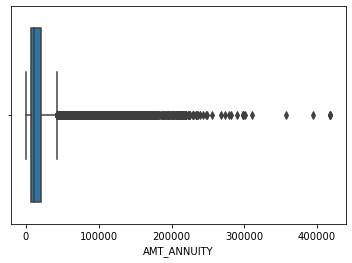

In [267]:
sns.boxplot(prevApp.AMT_ANNUITY)

In [268]:
#Since ANNUITY has a few outliers it wouldn't be appropiate to take a mean, hence taking a median for null values
prevApp.AMT_ANNUITY.fillna(prevApp.AMT_ANNUITY.median(),inplace=True)

In [269]:
prevApp.isna().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                1
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
NAME_CLIENT_TYPE          0
dtype: int64

In [270]:
#Dropping the single null credit entry
prevApp=prevApp[~prevApp["AMT_CREDIT"].isna()]

In [271]:
#A loop to check the value of all columns at once
for c in prevApp.columns:
    print ("\n---- %s ---" % c)
    print (prevApp[c].value_counts())


---- SK_ID_PREV ---
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670213, dtype: int64

---- SK_ID_CURR ---
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

---- NAME_CONTRACT_TYPE ---
Cash loans         747553
Consumer loans     729151
Revolving loans    193163
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

---- AMT_ANNUITY ---
11250.000    386209
2250.000      31865
6750.000      13442
9000.000      12496
22500.000     11903
              ...  
3794.445          1
8723.160          1
27948.330         1
25374.285         1
14704.290         1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

---- AMT_APPLICATION ---
0.00         392401
45000.00      47831
225000.00     43543
135000.00     40678
450000.00

#### Since the Data cleaning for both the datasets have been done, we can now move on the identifying and handling outliers

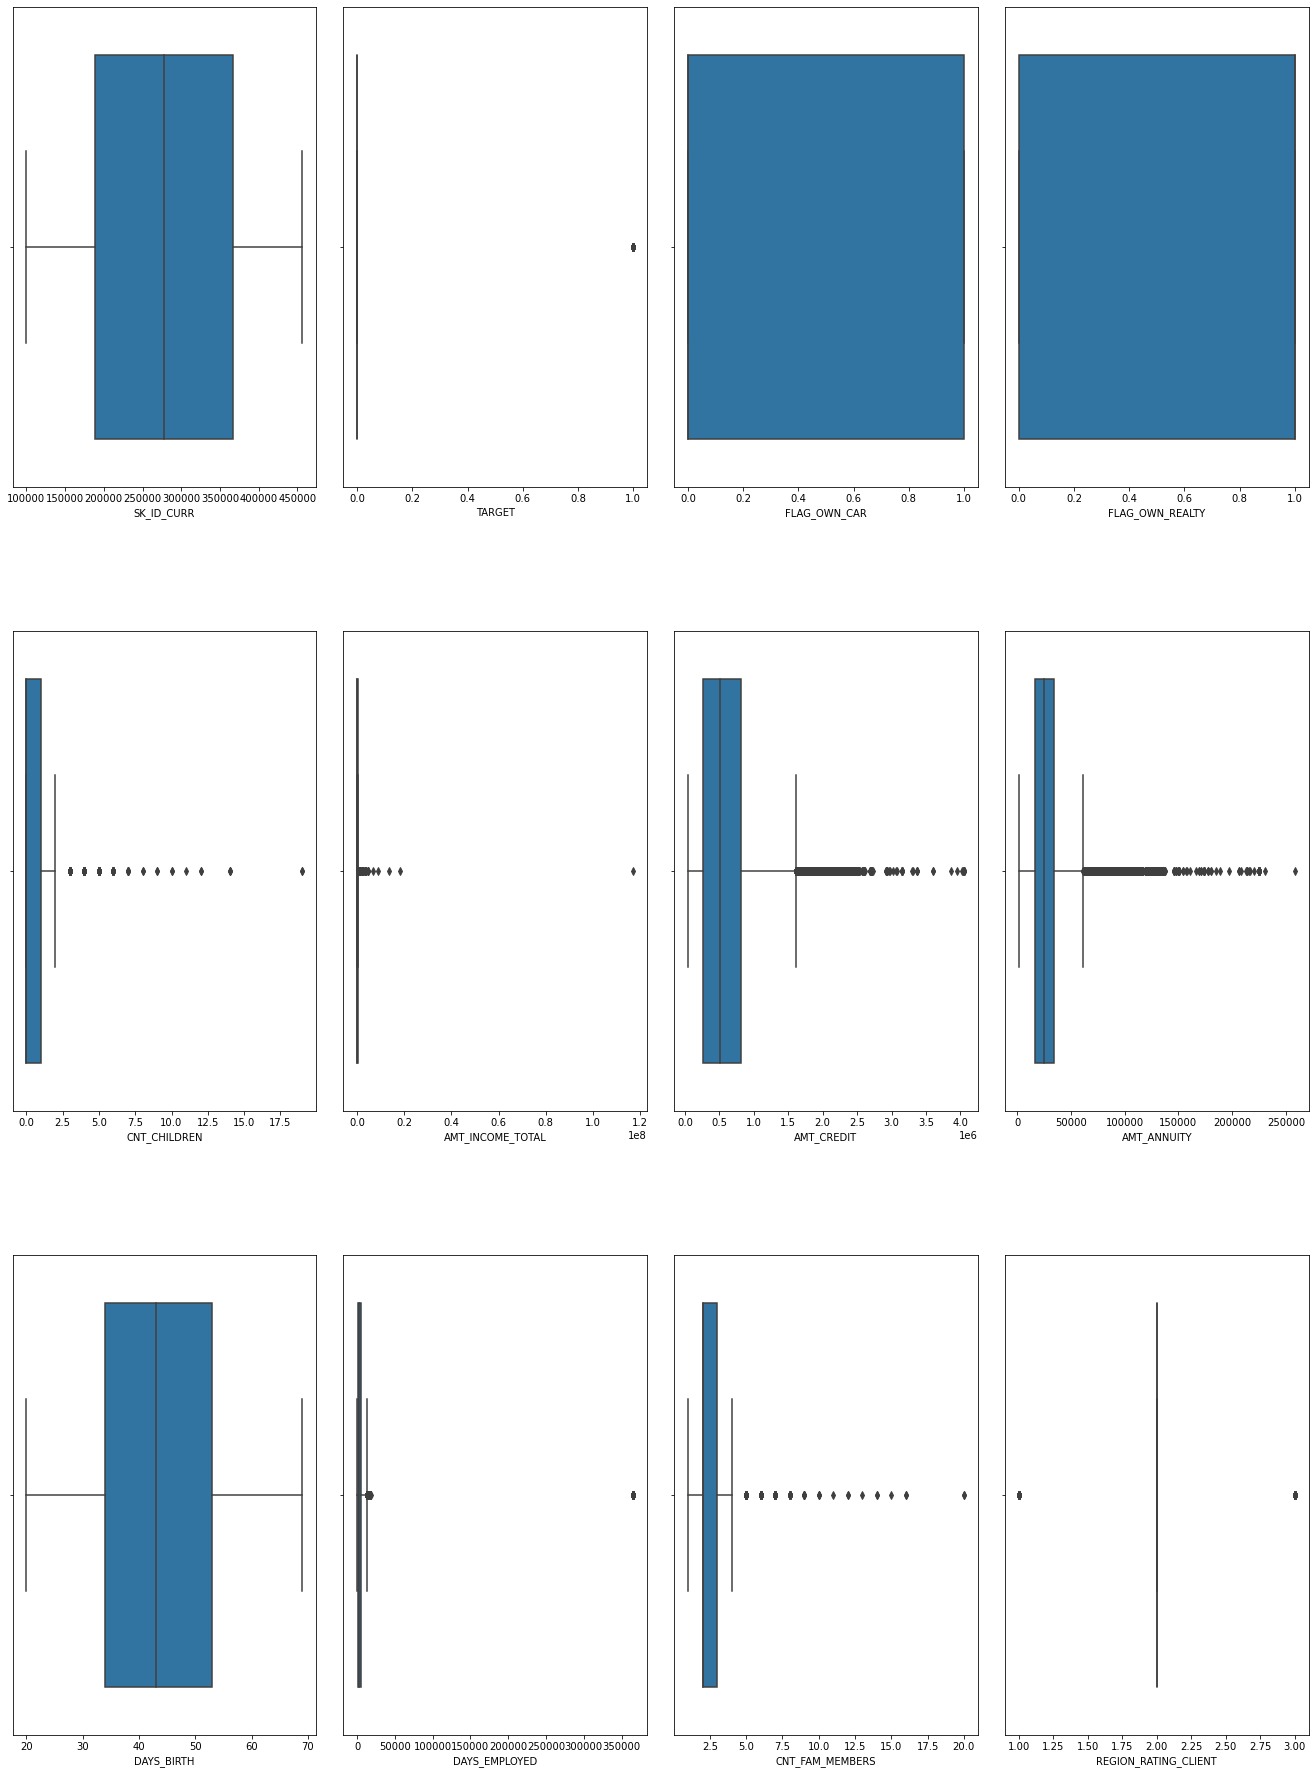

In [272]:
#Using a for loop to print all the box plots at once for Application Data
numerical_col = appData.select_dtypes(include='number').columns
len(numerical_col)

fig , axes = plt.subplots(nrows=3, ncols=4, constrained_layout=True)                 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=6, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        
    sns.boxplot(appData[column],ax=ax)   

#### From the above plots we can infer that,
- There are a large number of outliers present in AMT_CREDIT, because the credit value can be different for every customer, and there could be customers who have taken a high credit.
- AMT_ANUUITY has a large number of outliers, just like AMT_CREDIT the anuuity or emi is based on the pricipal amount of the customer and can be higher for a few customers.
- There are a few outliers in CNT_FAM_MEMBERS but most customers have 4 members
- There is a single abnormal value in DAYS_EMPLOYED and AMT_INCOME_TOTAL, and I believe the error in DAYS_EMPLOYEED is due to an input error.
- The IQR for AMT_INCOME_TOTAL is very thin. It has many outliers, and a reason for this could be because people with higher income diminish as it raises.
- FLAG_OWN_CAR and FLAG_OWN_REALTY do not have the first and third quatile hence it can be said that most customers have a car
- CNT_CHILDREN have outlier values where there are children greater than 5.

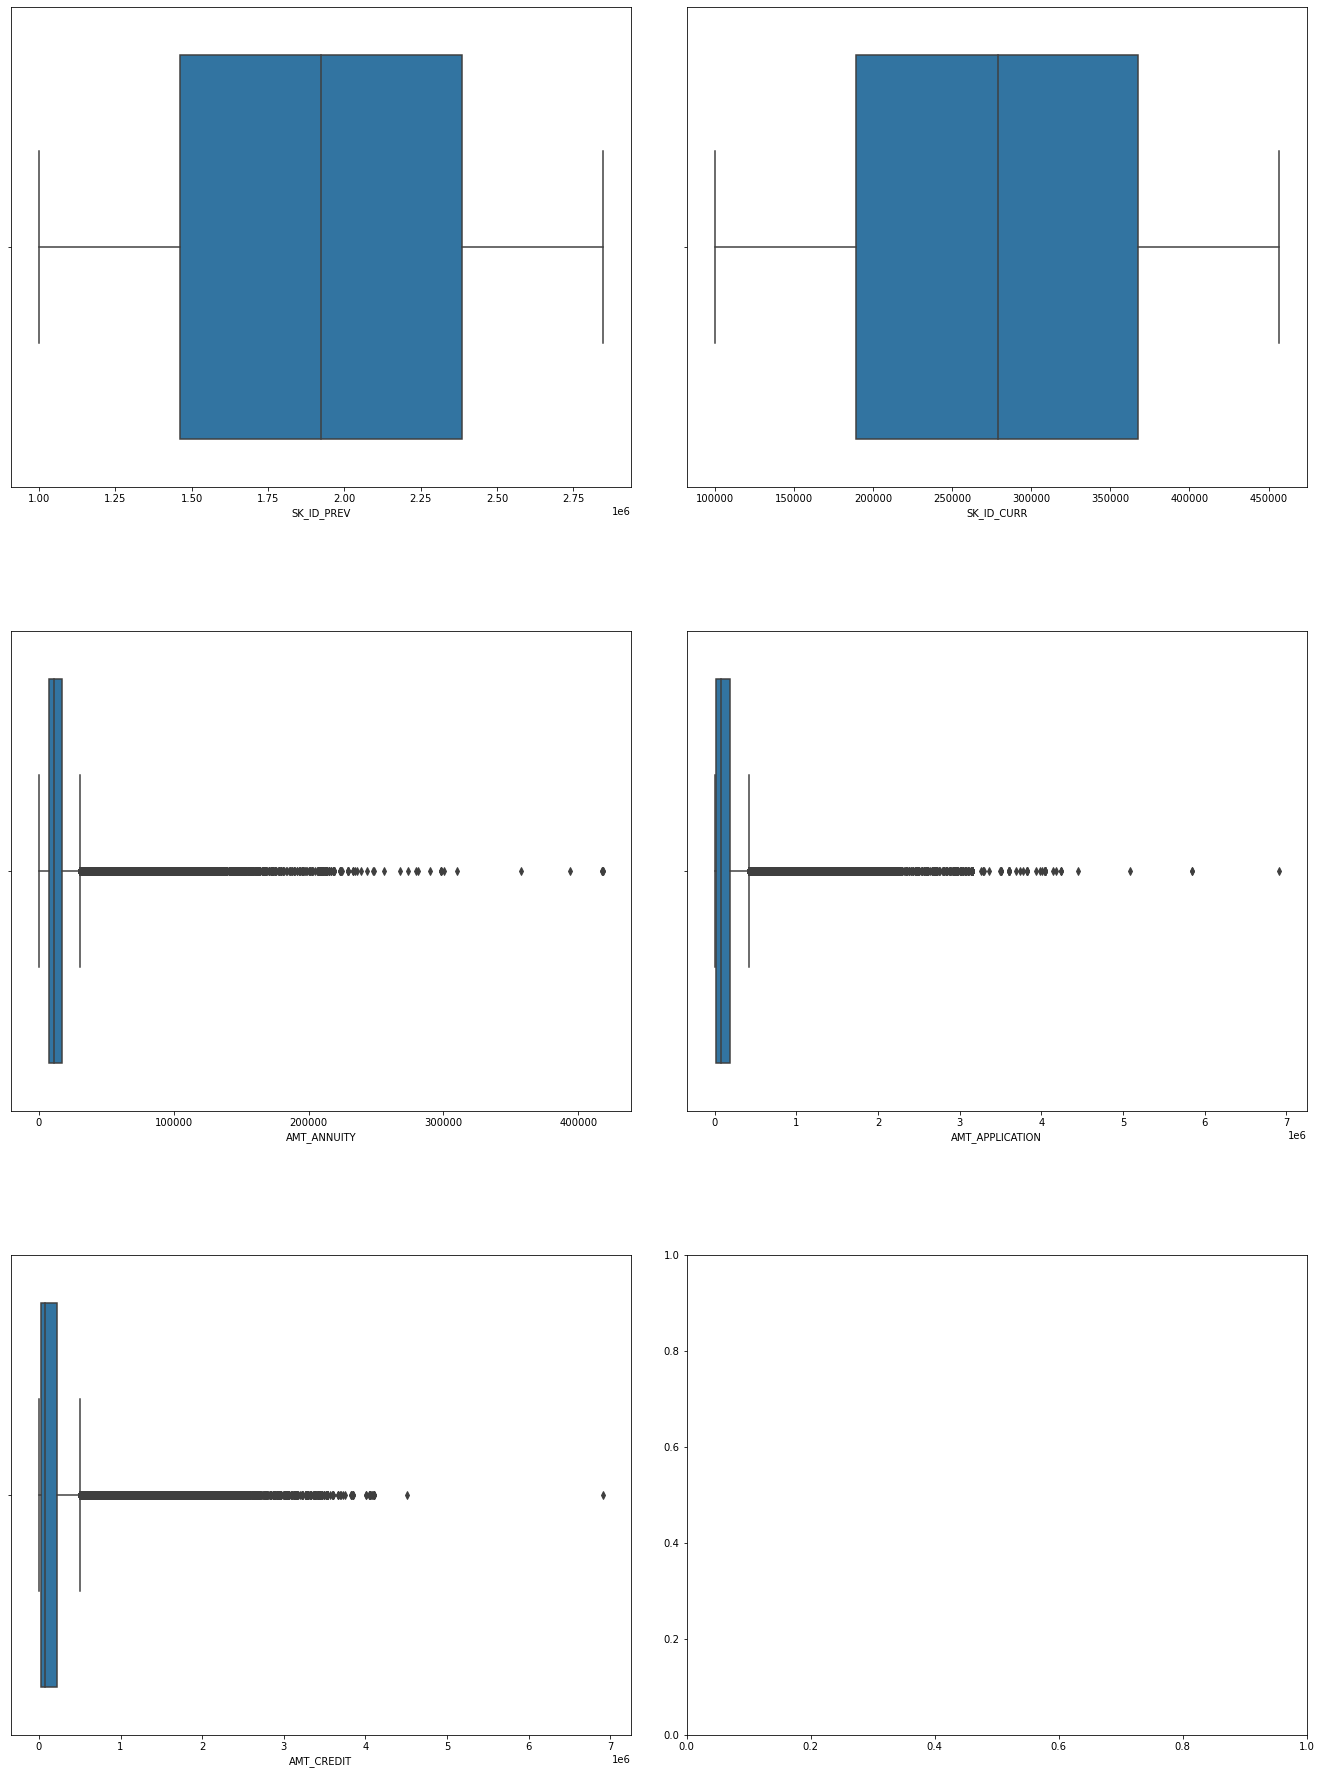

In [273]:
#Using a for loop to print all the box plots at once for Previous Application Data
numerical_col = prevApp.select_dtypes(include='number').columns
len(numerical_col)

fig , axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True)                 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=6, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        
    sns.boxplot(prevApp[column],ax=ax)   

#### From the above plots we can infer that,
- There are a large number of outliers present in AMT_CREDIT and a handful of abnormalities.
- AMT_APPLICATION also has an a large number of outliers, this could be because some clients might demand an absurd amount of credit on their previous application
- Just like Application Data AMT_ANNUITY has a large number of outliers

### Combining the two datasets


In [274]:
#Mergiing both the datasets
applications=pd.merge(left=appData,right=prevApp,how='inner',on='SK_ID_CURR',suffixes='_x')

## 2. Data Imbalance 


### 2.1 Repayer and Defaulter analysis

<AxesSubplot:ylabel='TARGET'>

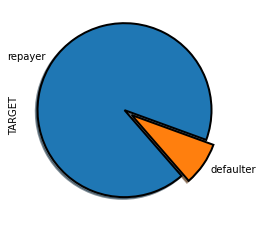

In [275]:
appData.TARGET.value_counts().plot.pie(startangle = -20,labels=["repayer","defaulter"],wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)

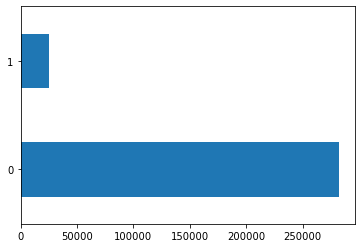

In [276]:
ax = appData["TARGET"].value_counts().plot(kind="barh")

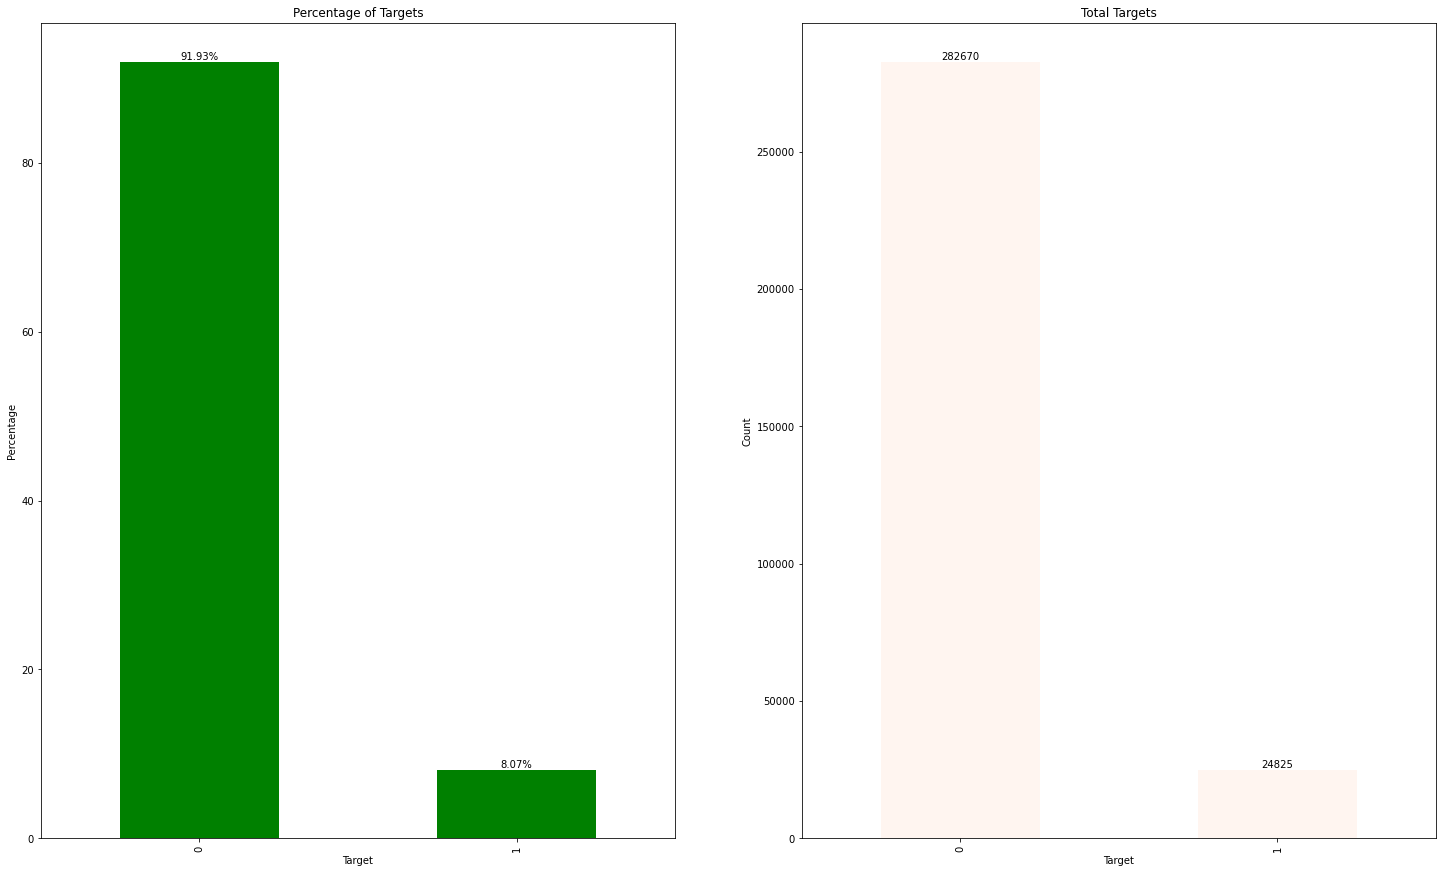

In [277]:
# In detailed plotting to check imbalance and ratio of the target variable
fig,ax= plt.subplots(1,2)
df = appData['TARGET'].value_counts(normalize=True).rename().mul(100)
Percentage_of_targets = df.plot(ax=ax[0],kind='bar',colormap='ocean',title='Percentage of Targets')
Percentage_of_targets.set_ylabel('Percentage')
Percentage_of_targets.set_xlabel('Target')
for p in Percentage_of_targets.patches:
    Percentage_of_targets.annotate(f'{p.get_height():.2f}%',(p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center',size=10, xytext=(0, 5), textcoords='offset points')
#Repeat for total number of targets
Total_targets =  appData['TARGET'].value_counts().plot(ax=ax[1], kind='bar',colormap='Reds',title='PERCENTAGE OF TARGETS')    
Total_targets.set_title('Total Targets')
Total_targets.set_ylabel('Count')
Total_targets.set_xlabel('Target')
for p in Total_targets.patches:
    Total_targets.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2,p.get_height()), ha='center', va='center',size=10, xytext=(0, 5),textcoords='offset points')
fig.set_size_inches(25, 15)


In [278]:
#Ratio of Targets 
b=92/8
b


11.5

91.3% of the customers are non-defaulters, while 8.07% are the latter. The ratio of the two is 23:2 

## 3. Univariate Analysis

Since univariate analysis requires the plotting of multiple graphs, a common function is created to aid this

In [279]:
def univariate_analysis(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = appData[feature].value_counts()
    # Calculate the percentage of target=1 per category value
    cat_perc = appData[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)  
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
    # Number of defaulters and repayers for the different value types
    s = sns.countplot(ax=ax1, x = feature, data=appData,hue ="TARGET",order=cat_perc[feature],palette=['g','r'])
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    # Plot 2 will have the percentage of defaulters for the given category
    s = sns.barplot(ax=ax2,x = feature,y='TARGET',order=cat_perc[feature],data=cat_perc,palette='rainbow')
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    # Define common styling
    # ylog if the graph values differ too much making some bars extremely small
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Red'})   
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3}) 
    ax1.legend(['Repayer','Defaulter'])
    ax2.set_title(feature + " Defaulter %") 
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

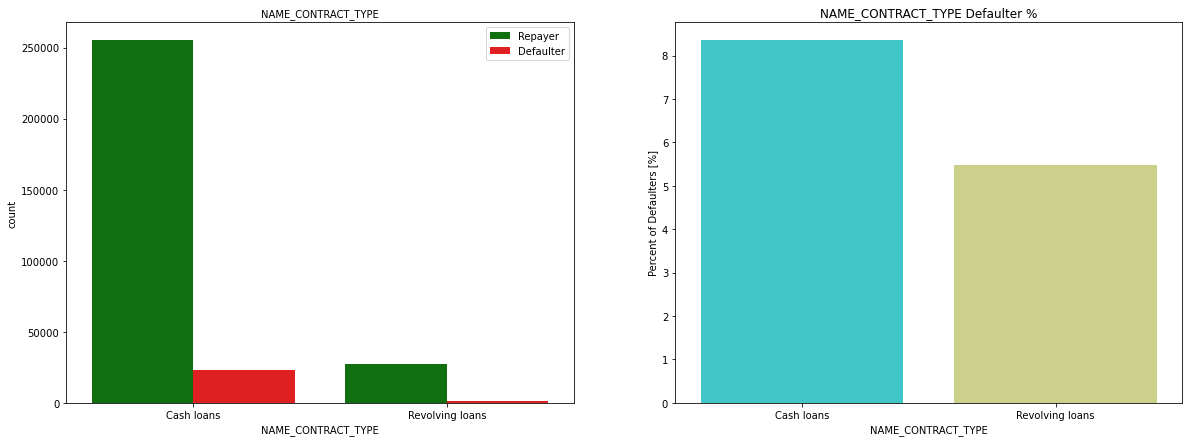

In [280]:
#Univariate analysis on name contract type
univariate_analysis('NAME_CONTRACT_TYPE')

**Insight:** Most loans are cash loans and only a small percentage are revolving loans. However even the small revolving loans that are issues have over 5% of those are defaulters.


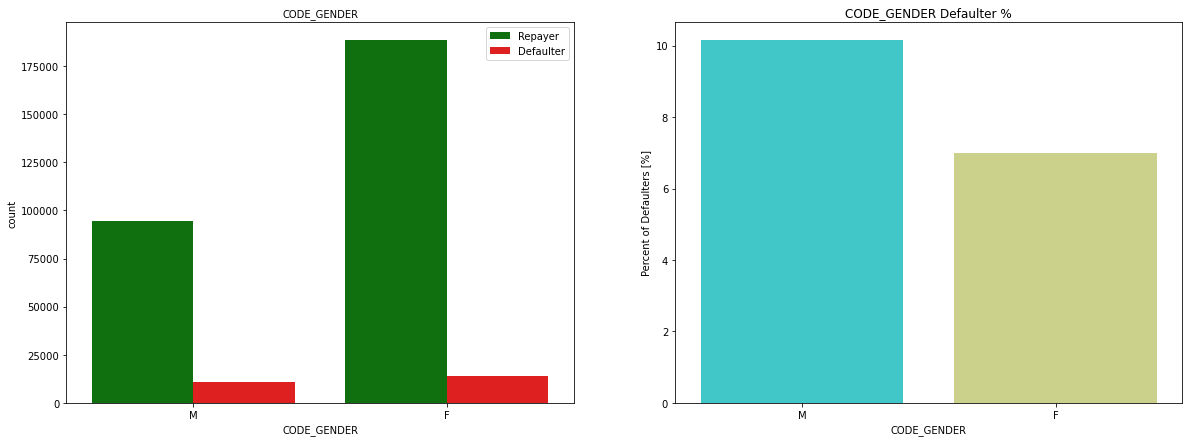

In [281]:
#Univariate analysis on gender
univariate_analysis('CODE_GENDER')

**Insight**: Female customers are much higher than their male counterparts, however males have a higher percentage of defaulting.

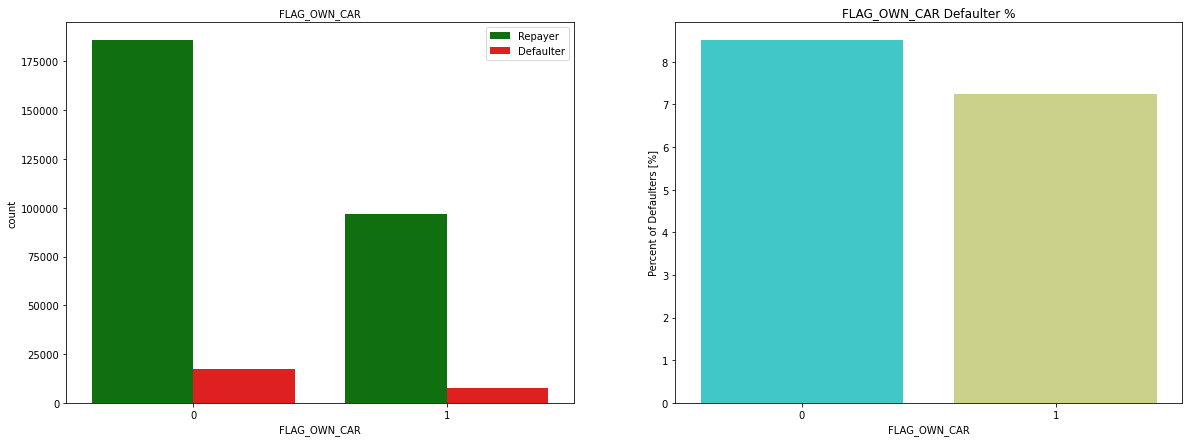

In [282]:
# Univariate analysis on the flag which indicates if the customer owns a car
univariate_analysis('FLAG_OWN_CAR')

**Insight**: Most customers own a car, but the amount of defaulters are those who do not own a car, this could be linked to the fact that the financial status of those who own a car is higher, however there is only 1% different in both. 

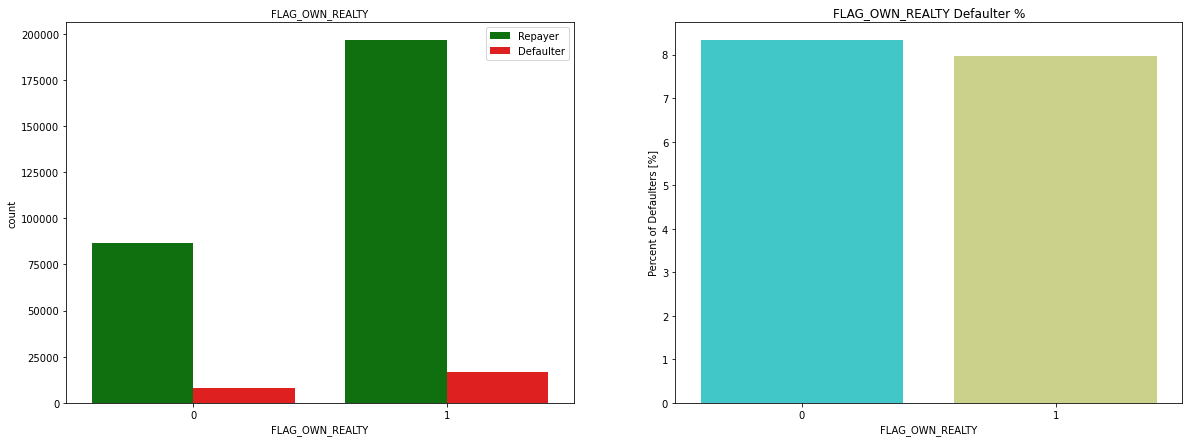

In [283]:
univariate_analysis('FLAG_OWN_REALTY')

**Insight**: Just like owning a car, owning realty and estates does not have a huge difference in one defaulting or not.

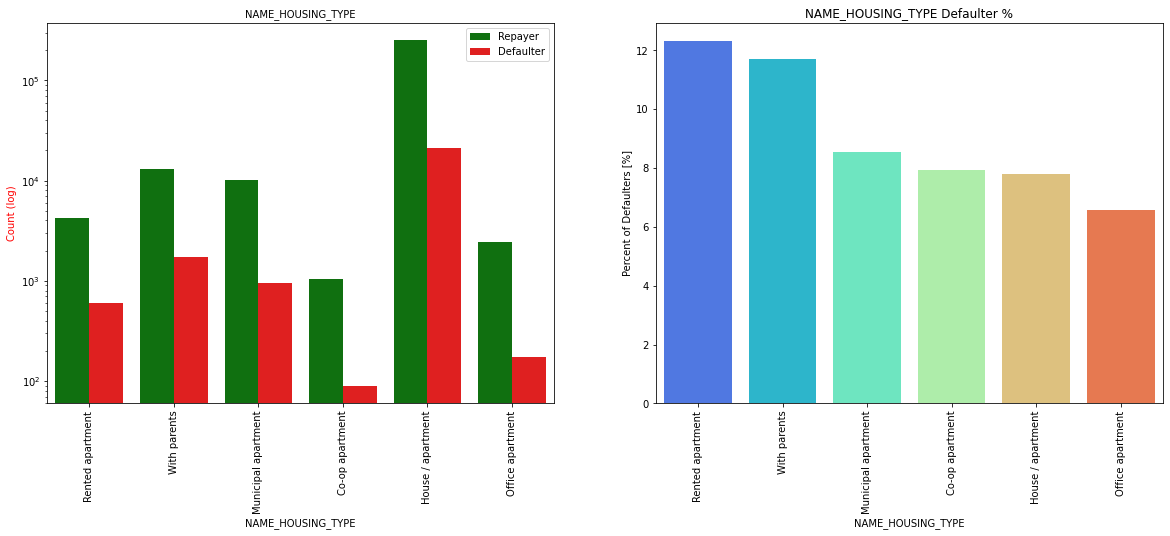

In [284]:
#Univariate analysis on the type of house
univariate_analysis("NAME_HOUSING_TYPE",label_rotation=True,ylog=True)

**Insight** : The distribution of housing types seems accurate, as house/apartments are leading. Customers who live in rented apartments have the highest chance of defaulting, which is around 12%. 
Customers who live with their parents come close to 12% as well, and this is possible because if a person is living with their parents or in a rented apartment, chances are they are not doing well financially.

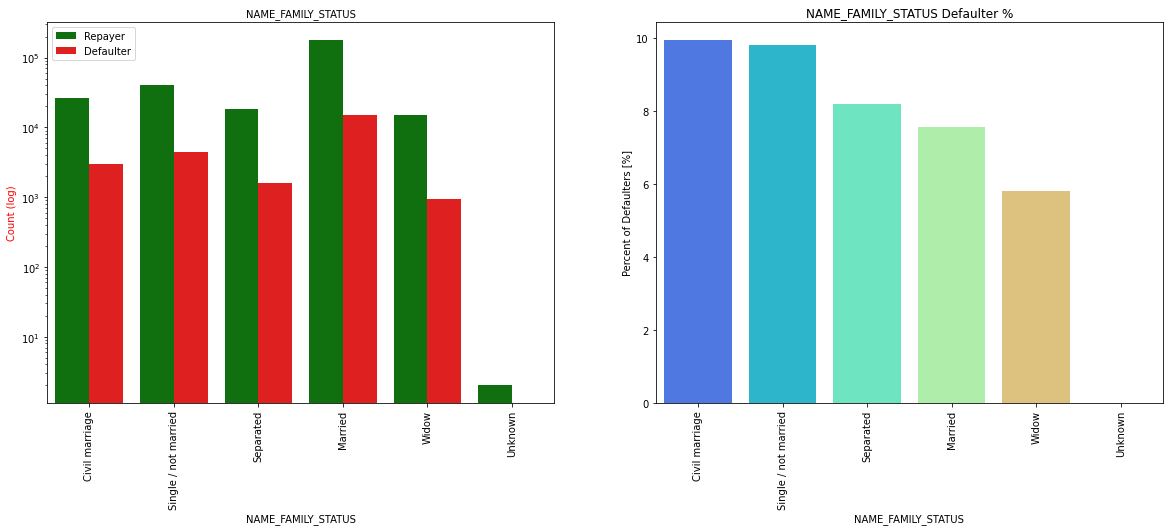

In [285]:
#Univariate analysis on the family status
univariate_analysis("NAME_FAMILY_STATUS",label_rotation=True,ylog=True)

**Insight**: The highest number of customers who take a loan are married, and the highest number of defaulters are those who take part in civil marriage.

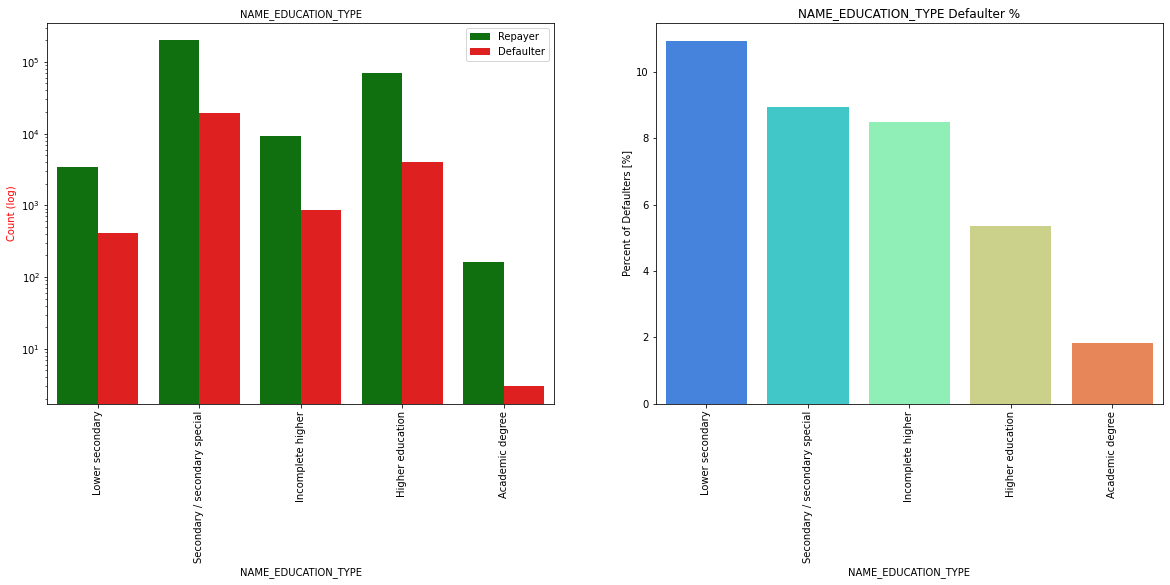

In [286]:
#Univariate analysis on the education
univariate_analysis("NAME_EDUCATION_TYPE",label_rotation=True,ylog=True)

**Insight**: The highest number of customers who take a loan are educated upto secondary. But an interesting thing here is that, even though the customers who have studied lower secondary are the 4th lowest type, they are the highest when it comes to defaulting.

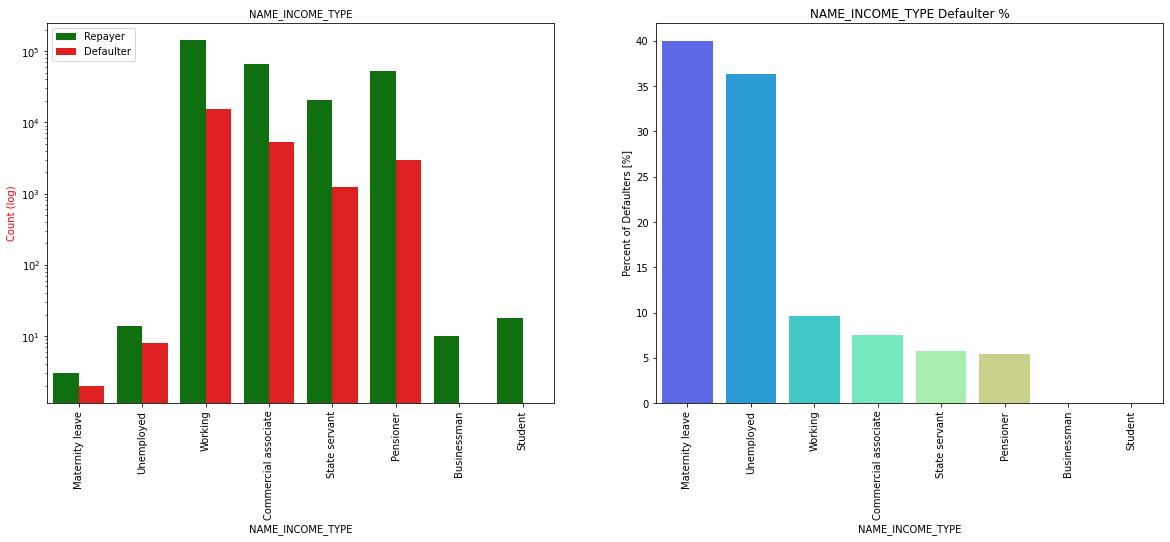

In [287]:
#Univariate analysis on the income type
univariate_analysis("NAME_INCOME_TYPE",label_rotation=True,ylog=True)

**Insight**: The highest type of incomes are working, commercial associate, state servant and pensioner, but none of these very high defaulters. But the smallest type of income that is maternity leave, have the highest fraction of defaulters, that is almost 40%. So it is clear that, a loan should not be given to anyone on a maternity leave henceforth. 
It is also worth mentioning that businessmen and students never default, they should be prioritized.

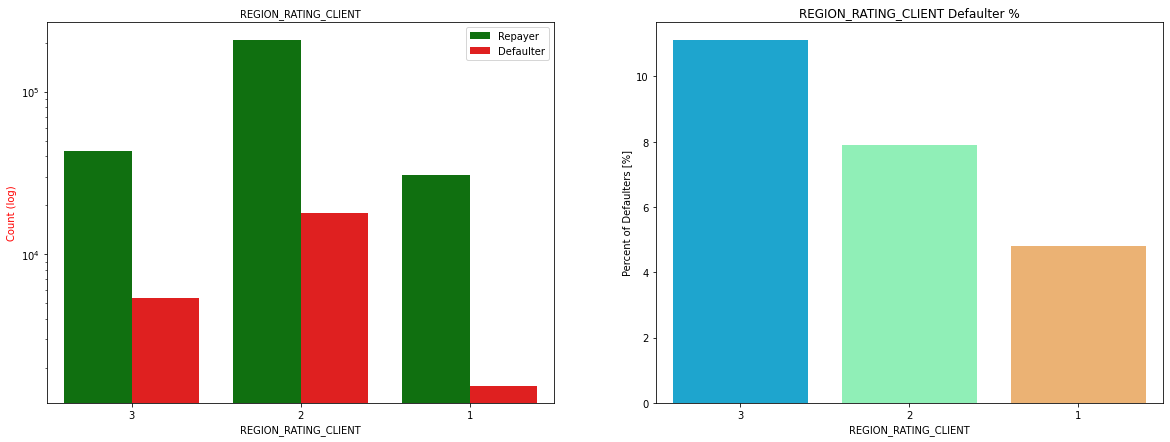

In [288]:
#Univariate analysis on the region rating
univariate_analysis("REGION_RATING_CLIENT",ylog=True)

**Insight:** While most customers are from the region with rating 2, the highest number of defaulters are from region 3, which could be true because the citizens in region 3 are not as financially sound as region 1 and 2. 
Region 1 has the lowest amount of defaulters, hence it could be said that it is safe to provide them a loan.

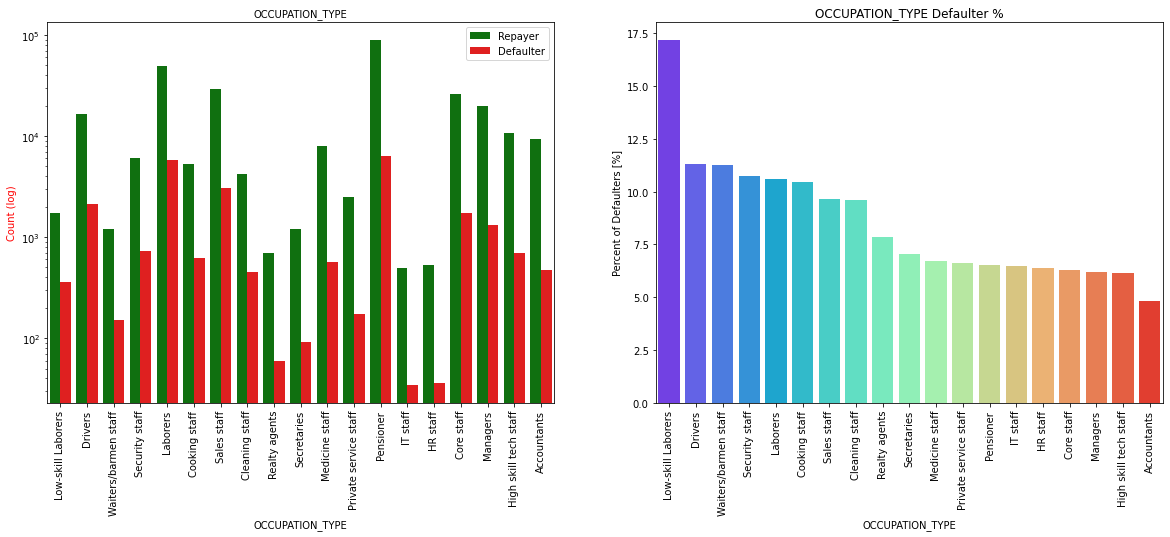

In [289]:
#Univariate analysis on the occupation type
univariate_analysis("OCCUPATION_TYPE",ylog=True,label_rotation=True)

**Insight**: Pensioners are the highest customers, and they have very low defaulter's rate, around 5%. Hence they are a safe option. But Low-skill laborers and drivers have a relatively high defaulters rate, hence should be avoided.

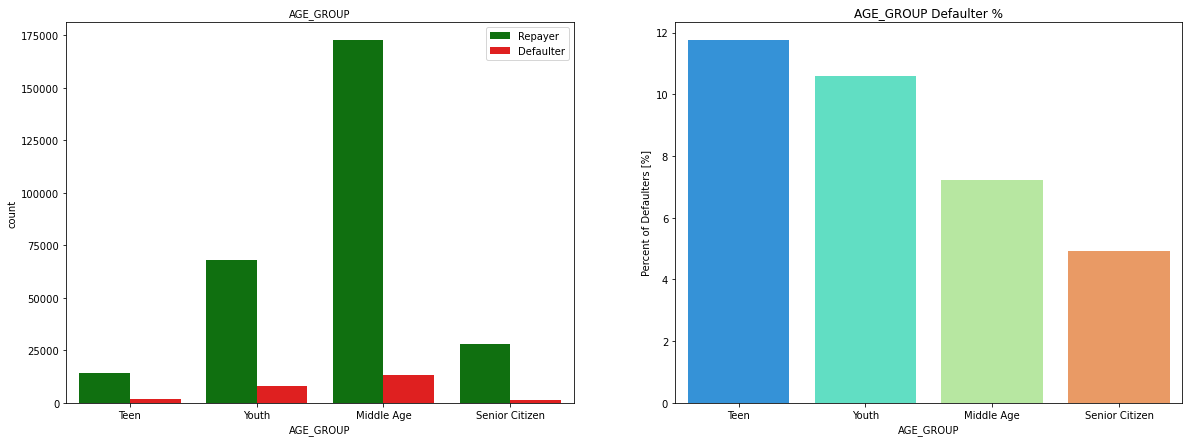

In [290]:
#Univariate analysis on the age group 
univariate_analysis("AGE_GROUP")

**Insight**: While the lowest age group is teens they are also the highest defaulters, and hence should be avoided. The older the age, the safer the loan is.

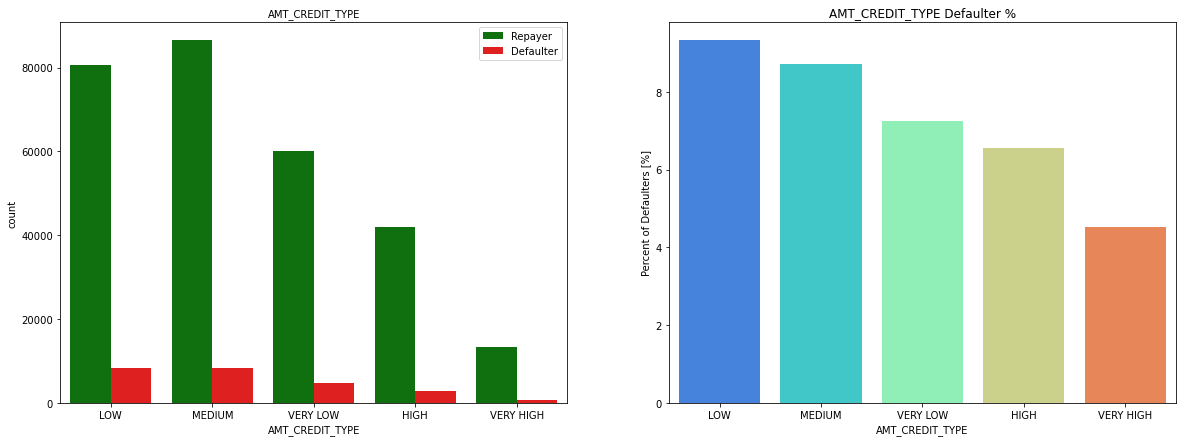

In [291]:
#Univariate analysis on credit range
univariate_analysis("AMT_CREDIT_TYPE")

**Insight**: It is seen that the lower the credit amount, the higher the chance of it being defaulted.

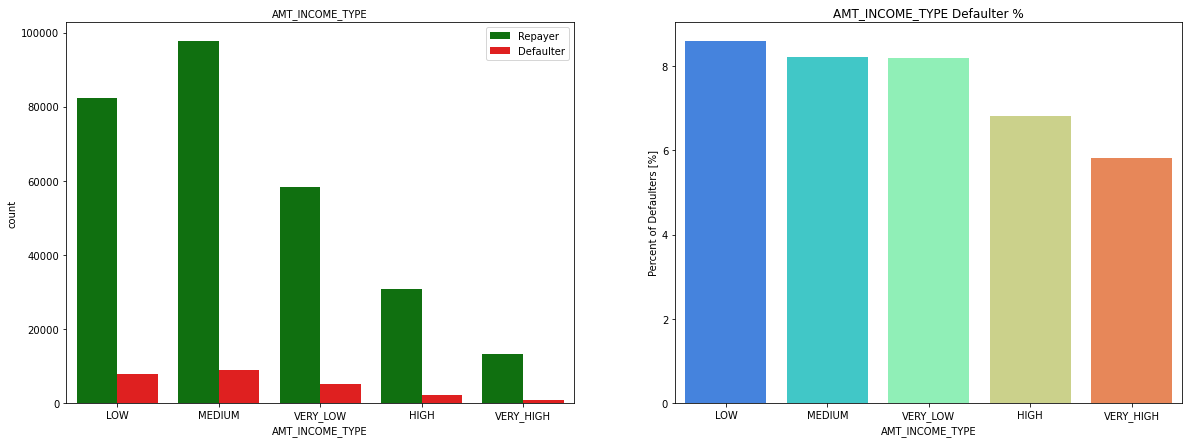

In [292]:
#Univariate analysis on income range
univariate_analysis("AMT_INCOME_TYPE")

**Insight**: The lower the income, the higher the chance of the customer defaulting, and this seems correct.

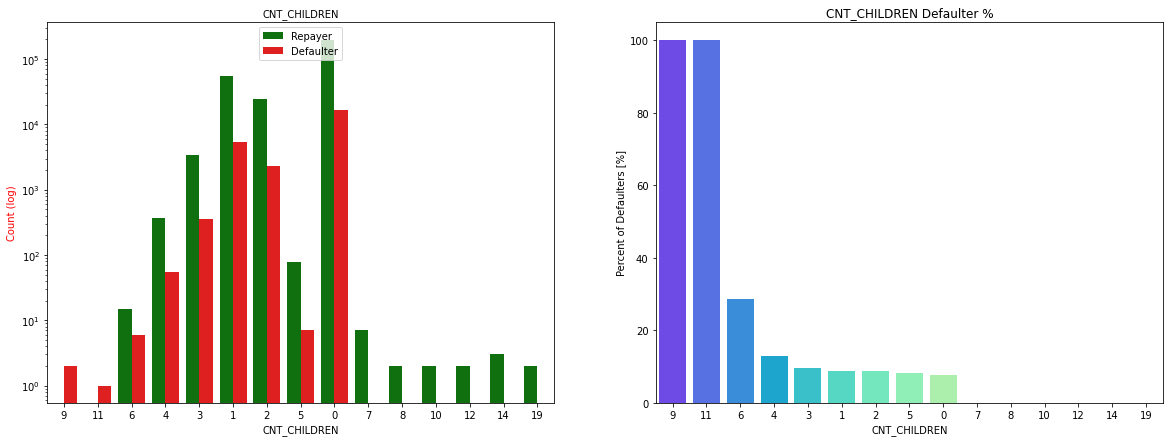

In [293]:
#Univariate analysis on the number of children
univariate_analysis("CNT_CHILDREN",ylog=True)

**Insight**: All the customers who had more than 6 children defaulted. Hence a loan should not been given to customers who have many children. 

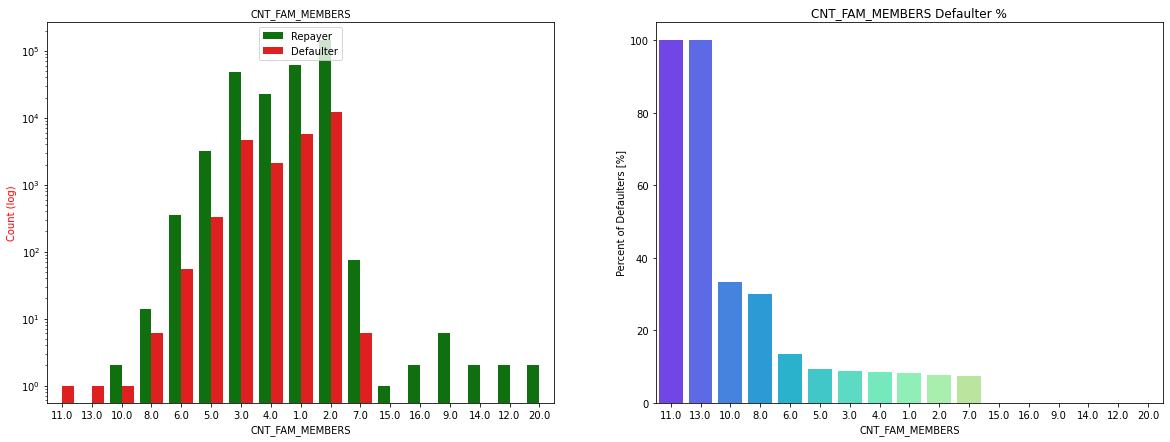

In [294]:
#Univariate analysis on the number of family members
univariate_analysis("CNT_FAM_MEMBERS",ylog=True)

**Insight**: Careful consideration should be made to anyone who has more than 4 family members, as the defaulter rate starts at 10%. And a loan should not be given to anyone who has 8 or more family members.

## 4. Bivariate Analysis 

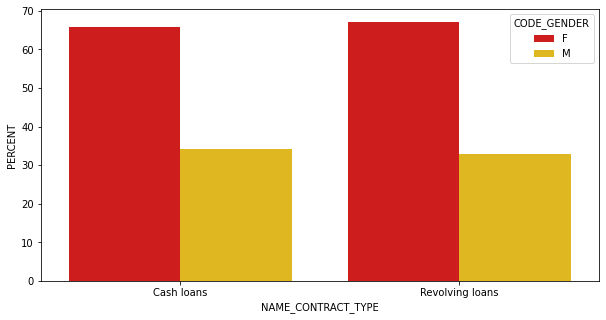

In [295]:
#Bivariate analysis on contract type and gender
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
bi_chart = appData['CODE_GENDER'].groupby(appData['NAME_CONTRACT_TYPE']).value_counts(normalize=True).mul(100).rename('PERCENT').reset_index()
bar_chart = sns.barplot(x='NAME_CONTRACT_TYPE', y='PERCENT', hue='CODE_GENDER', palette='hot', data=bi_chart)

**Insight**: There is very little difference in the type of loan taken based on Gender

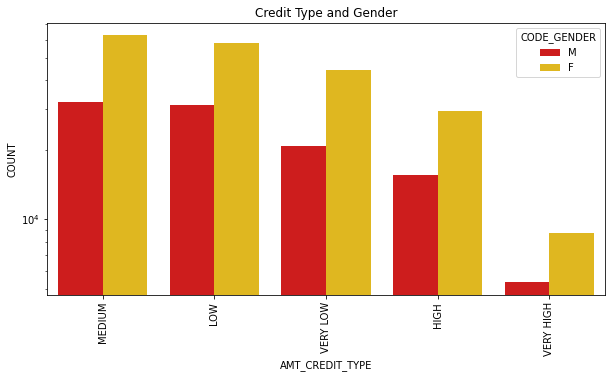

In [296]:
#Bivariate analysis on gender and credit
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
bar_chart = sns.countplot(x='AMT_CREDIT_TYPE', hue='CODE_GENDER', data=appData, palette='hot',
                         order = appData['AMT_CREDIT_TYPE'].value_counts().index);
plt.yscale('log')
plt.ylabel('COUNT')
plt.title('Credit Type and Gender')
plt.xticks(rotation=90);

**Insight**: It is seen that the ratio of females to males is highest when it comes to very high credit. 

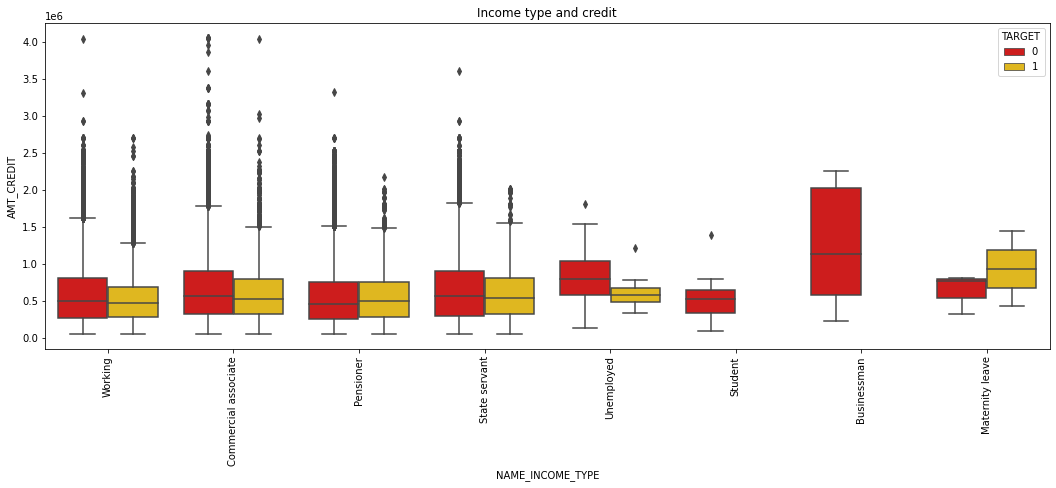

In [297]:
# Bivariate analysis with respect to target on Income type and credit
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('Income type and credit')
sns.boxplot(data=appData,y= 'AMT_CREDIT', x='NAME_INCOME_TYPE', hue='TARGET', palette='hot',order=appData['NAME_INCOME_TYPE'].value_counts().index);

**Insight**: While commercial associates have the highest amount of credit, they also have many defaulters. Businessmen take high credited loans and no defaulters, so they are a great and safe choice. 
Maternity leaves should be avoided at all costs as they have too many defaulters.

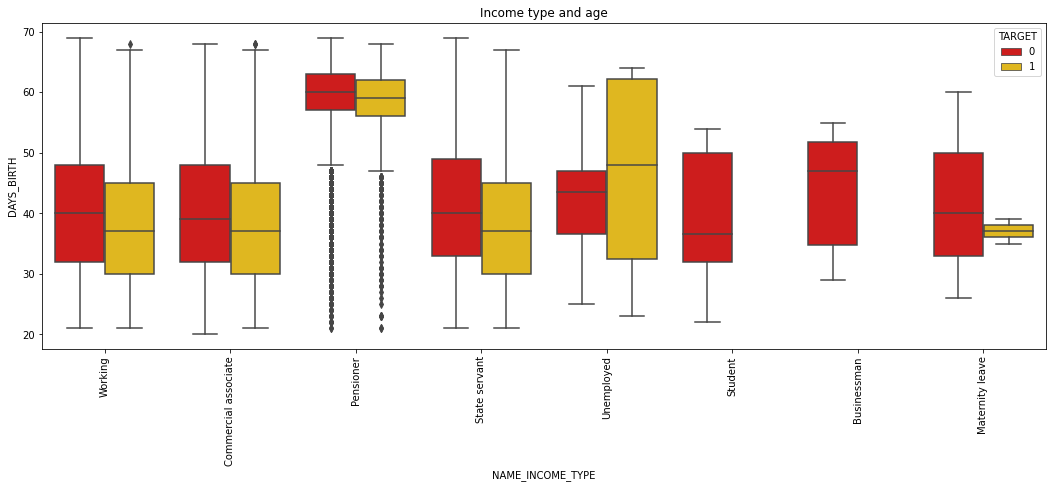

In [298]:
# Bivariate analysis with respect to target on age and credit
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('Income type and age')
sns.boxplot(data=appData,y= 'DAYS_BIRTH', x='NAME_INCOME_TYPE', hue='TARGET', palette='hot',order=appData['NAME_INCOME_TYPE'].value_counts().index);

**Insight**: In most of the cases we can see that the age of non-defaulters is usually higher than those of defaulters, hence age can play a role in if the person will be able to repay the loan or not.
In a few exceptional cases of unemployment, the average age of deafaulters is higher because unemployed are spread across all ages.

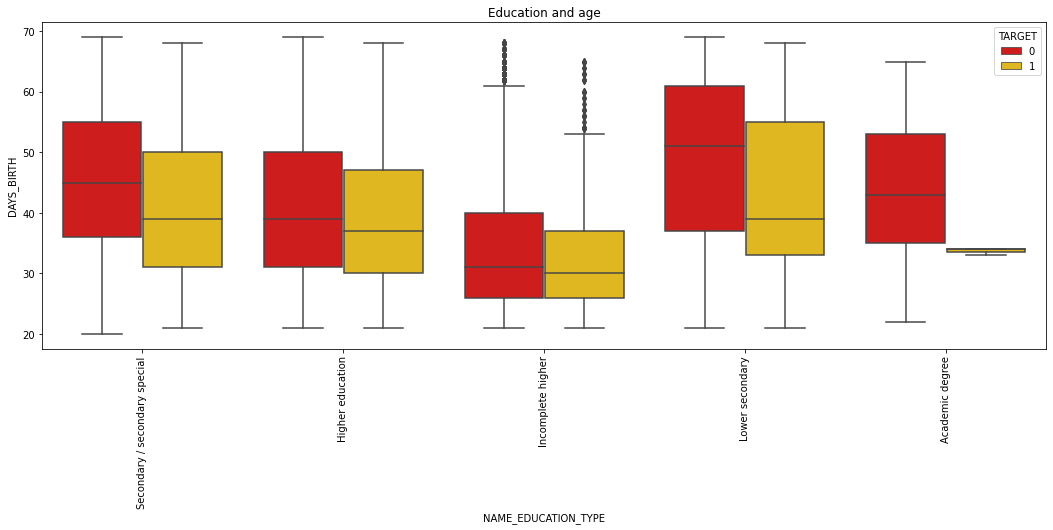

In [299]:
# Bivariate analysis with respect to target on age and education
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title('Education and age')
sns.boxplot(data=appData,y= 'DAYS_BIRTH', x='NAME_EDUCATION_TYPE', hue='TARGET', palette='hot',order=appData['NAME_EDUCATION_TYPE'].value_counts().index);

**Insight**: Anyone with an age of 40 or above who has academic degree, is a safe and can will most probably not be a defaulter

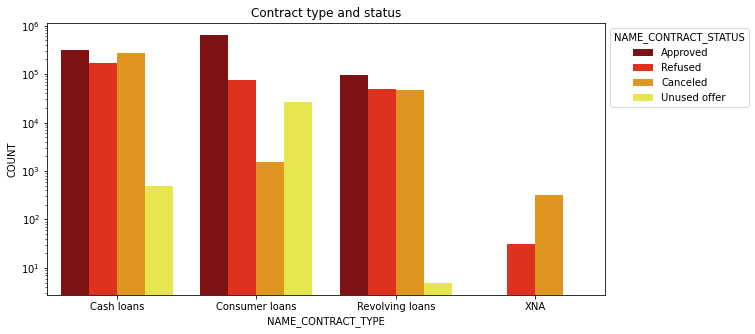

In [300]:
# Bivariate analysis on contract type and contract status 
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
c_prev =sns.countplot(x='NAME_CONTRACT_TYPE', hue='NAME_CONTRACT_STATUS', data=prevApp, palette='hot',
                  order = prevApp['NAME_CONTRACT_TYPE'].value_counts().index)
c_prev.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'NAME_CONTRACT_STATUS')
plt.title('Contract type and status')
plt.ylabel('COUNT')
plt.yscale('log')

**Insight** Very few consumer loans are cancelled and very few revolving loans are unused.

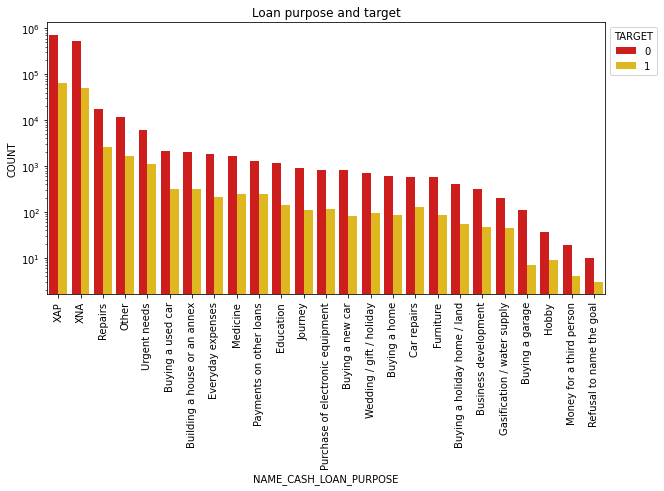

In [301]:
# Bivariate analysis on cash loan purpose and target
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='TARGET', data=applications, palette='hot',
                         order = applications['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'TARGET')
plt.title('Loan purpose and target')
plt.ylabel('COUNT')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

**Insight**: XAP and XNA are the highest number of clients, and these values could be invalid. They also have a high percentage of defaulters.

In [302]:
#Segmenting the data into defaulters and non-defaulters
Non_Defaulters = applications.loc[applications["TARGET"]==0] 
Defaulters = applications.loc[applications["TARGET"]==1]

In [303]:
#Dropping varaible as it won't be useful in analysis 
Defaulters.drop("SK_ID_CURR",inplace=True,axis=1)
Non_Defaulters.drop("SK_ID_CURR",inplace=True,axis=1)

In [304]:
#TARGET variable is not needed as they data is divided into defaulter and non defaulters
Defaulters.drop("TARGET",inplace=True,axis=1)
Non_Defaulters.drop("TARGET",inplace=True,axis=1)

In [305]:
Defaulters.describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,SK_ID_PREV,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx
count,122359.000000,122359.000000,122359.000000,1.223590e+05,1.223590e+05,122359.000000,122359.00000,122359.000000,122359.000000,122359.000000,1.223590e+05,122359.000000,1.223590e+05,1.223590e+05
mean,0.314795,0.713646,0.452235,1.719288e+05,5.580154e+05,26681.162575,41.32117,49525.683775,2.193946,2.151333,1.926218e+06,14165.221087,1.699197e+05,1.939147e+05
std,0.464436,0.452059,0.749511,5.848945e+05,3.428177e+05,12369.425167,11.38699,122572.489237,0.930927,0.496484,5.318725e+05,11879.054416,2.862931e+05,3.157599e+05
min,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2722.500000,21.00000,0.000000,1.000000,1.000000,1.000072e+06,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,1.125000e+05,2.844000e+05,17775.000000,32.00000,766.000000,2.000000,2.000000,1.469506e+06,7268.220000,0.000000e+00,2.019375e+04
50%,0.000000,1.000000,0.000000,1.575000e+05,4.950000e+05,25339.500000,40.00000,1635.000000,2.000000,2.000000,1.926021e+06,11250.000000,6.655500e+04,7.470000e+04
75%,1.000000,1.000000,1.000000,2.025000e+05,7.297920e+05,33066.000000,50.00000,3630.000000,3.000000,2.000000,2.387610e+06,15934.477500,1.800000e+05,2.250000e+05
max,1.000000,1.000000,11.000000,1.170000e+08,3.020760e+06,149211.000000,68.00000,365243.000000,13.000000,3.000000,2.845379e+06,281027.250000,3.982500e+06,3.524220e+06


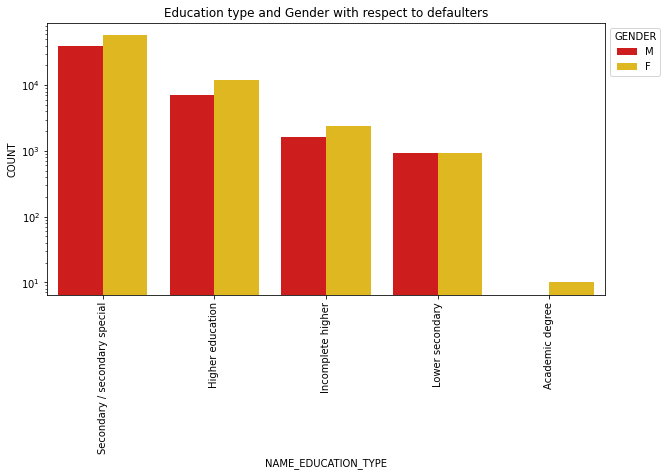

In [306]:
# Bivariate analysis on education of customers who defaulted of different sex
fig, axes = plt.subplots()
fig.set_size_inches(10,5)
b_e=sns.countplot(x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', data=Defaulters, palette='hot',
                         order = Defaulters['NAME_EDUCATION_TYPE'].value_counts().index)
b_e.legend(bbox_to_anchor=(1, 1), loc='upper left',title = 'GENDER')
plt.title('Education type and Gender with respect to defaulters')
plt.ylabel('COUNT')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

**Insight**: The number of females who take loans are higher, but despite that the number of male defaulters is almost the same as females in the Secondary education category. Hence males with secondary education should be avoided

## 5. Correlation between different variables


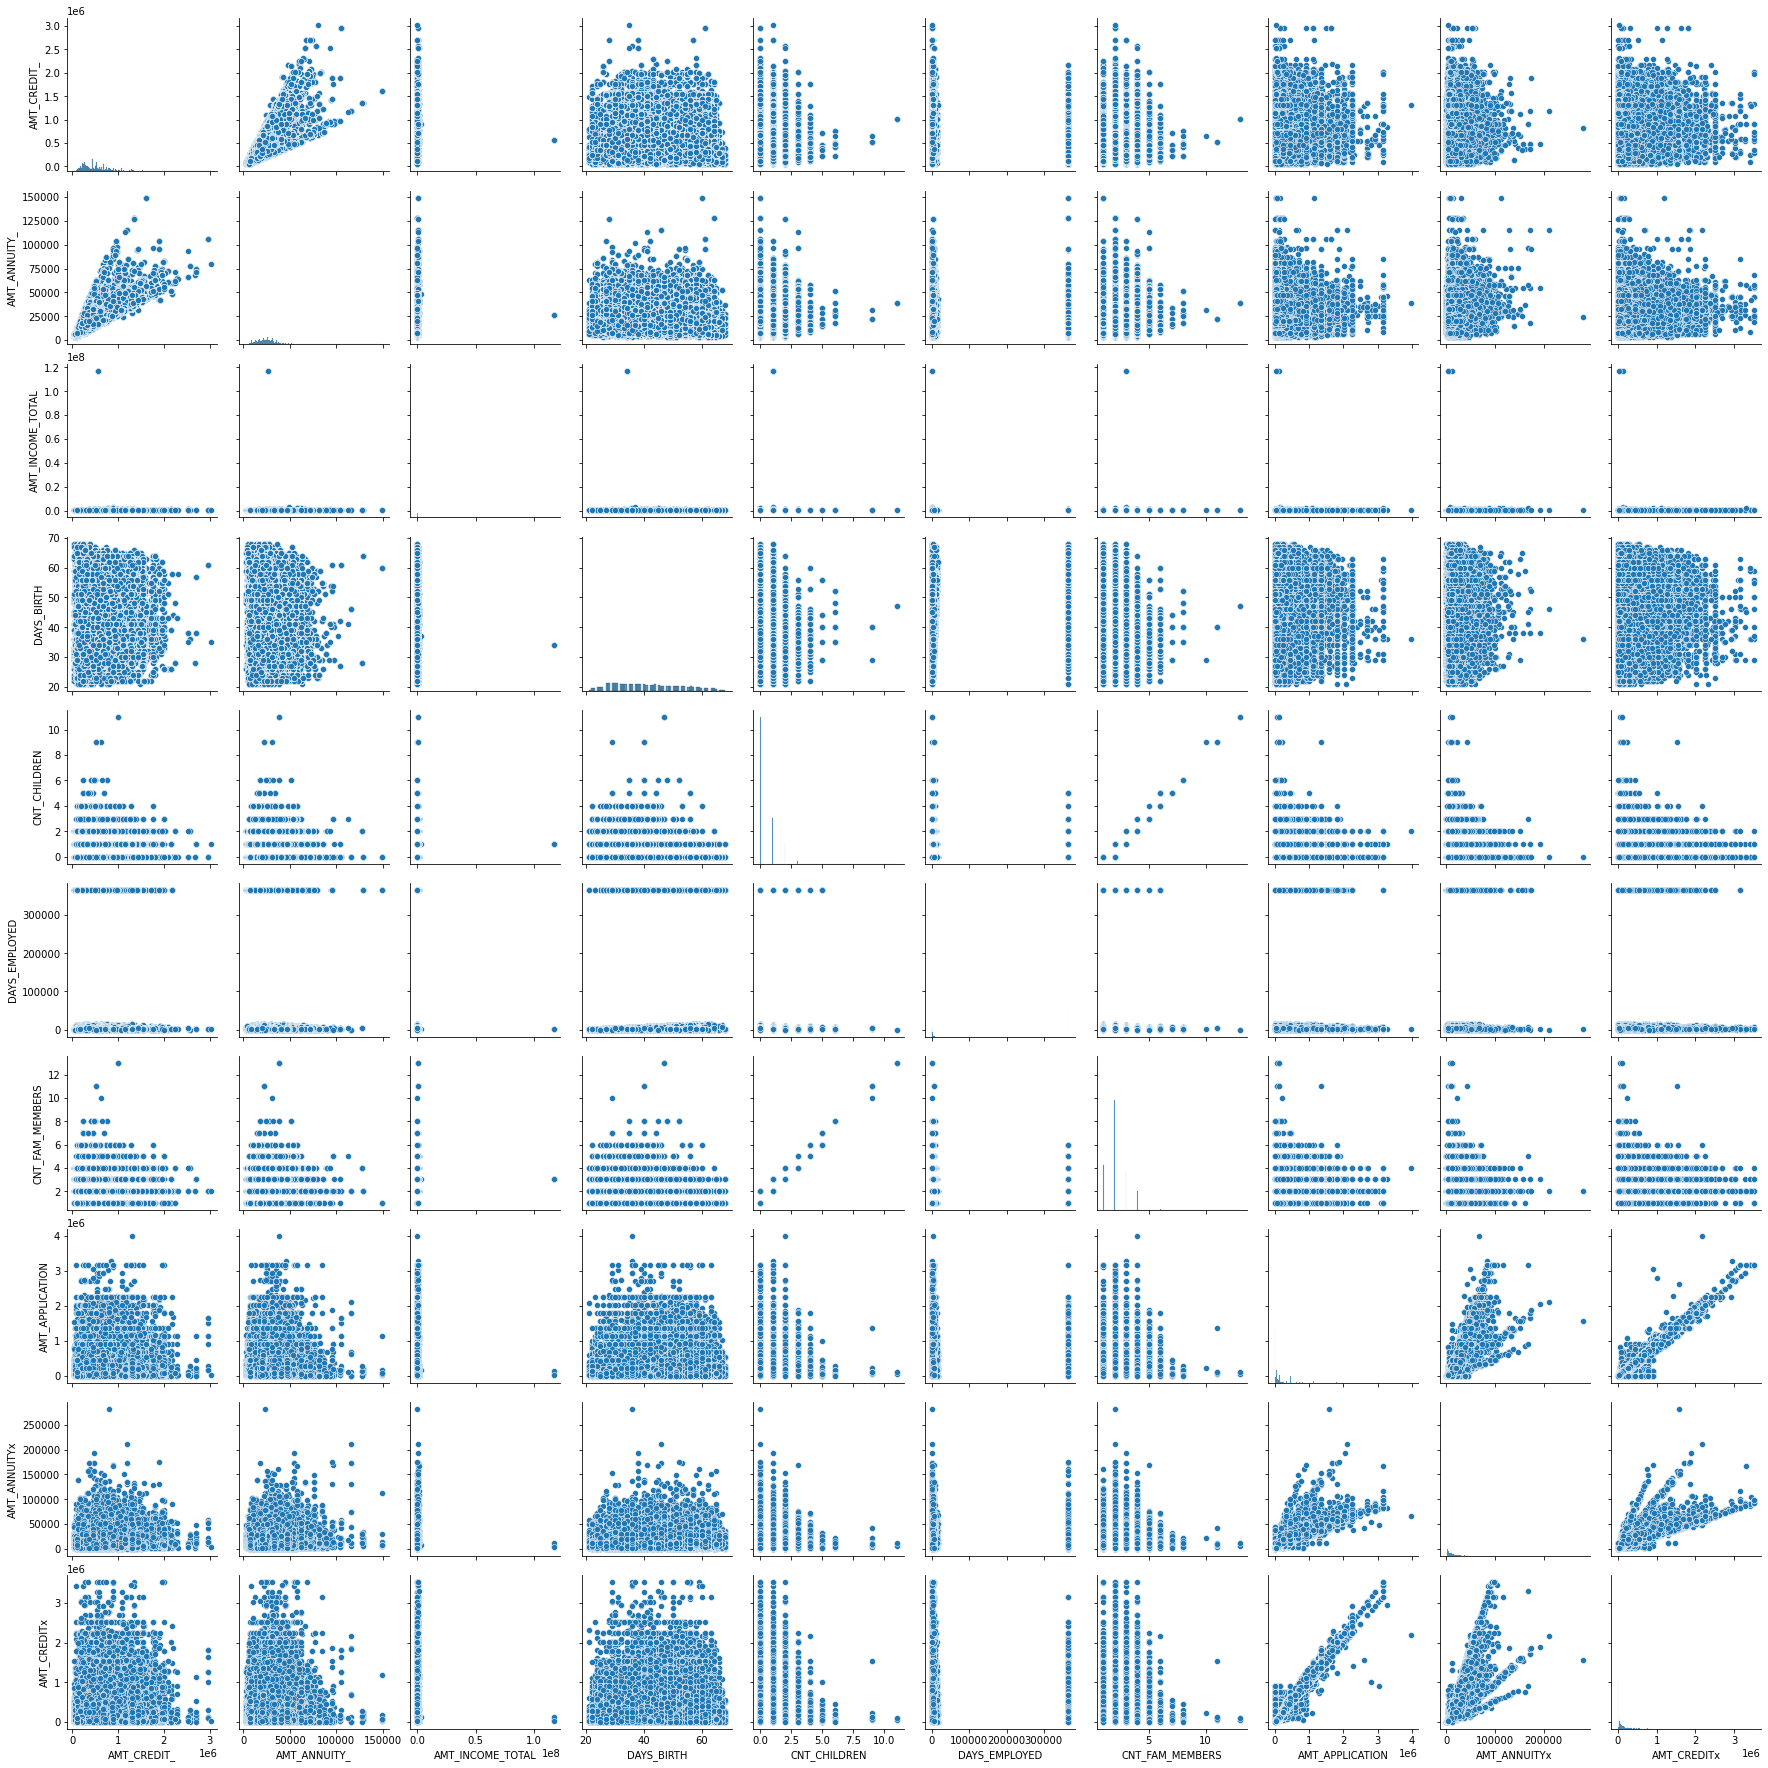

In [307]:
#A pair plot for all numerical variables for Non Defaulters
pair = Defaulters[['AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_INCOME_TOTAL','DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED','CNT_FAM_MEMBERS','AMT_APPLICATION','AMT_ANNUITYx','AMT_CREDITx']]
sns.pairplot(pair)

plt.show()

**Insight**: Annuity and credit are highly correlated. AMT_APPLICATION and AMT_CREDITx(Previous application credit) are also highly correlated. Naturally the amount of children and count of family members are related.

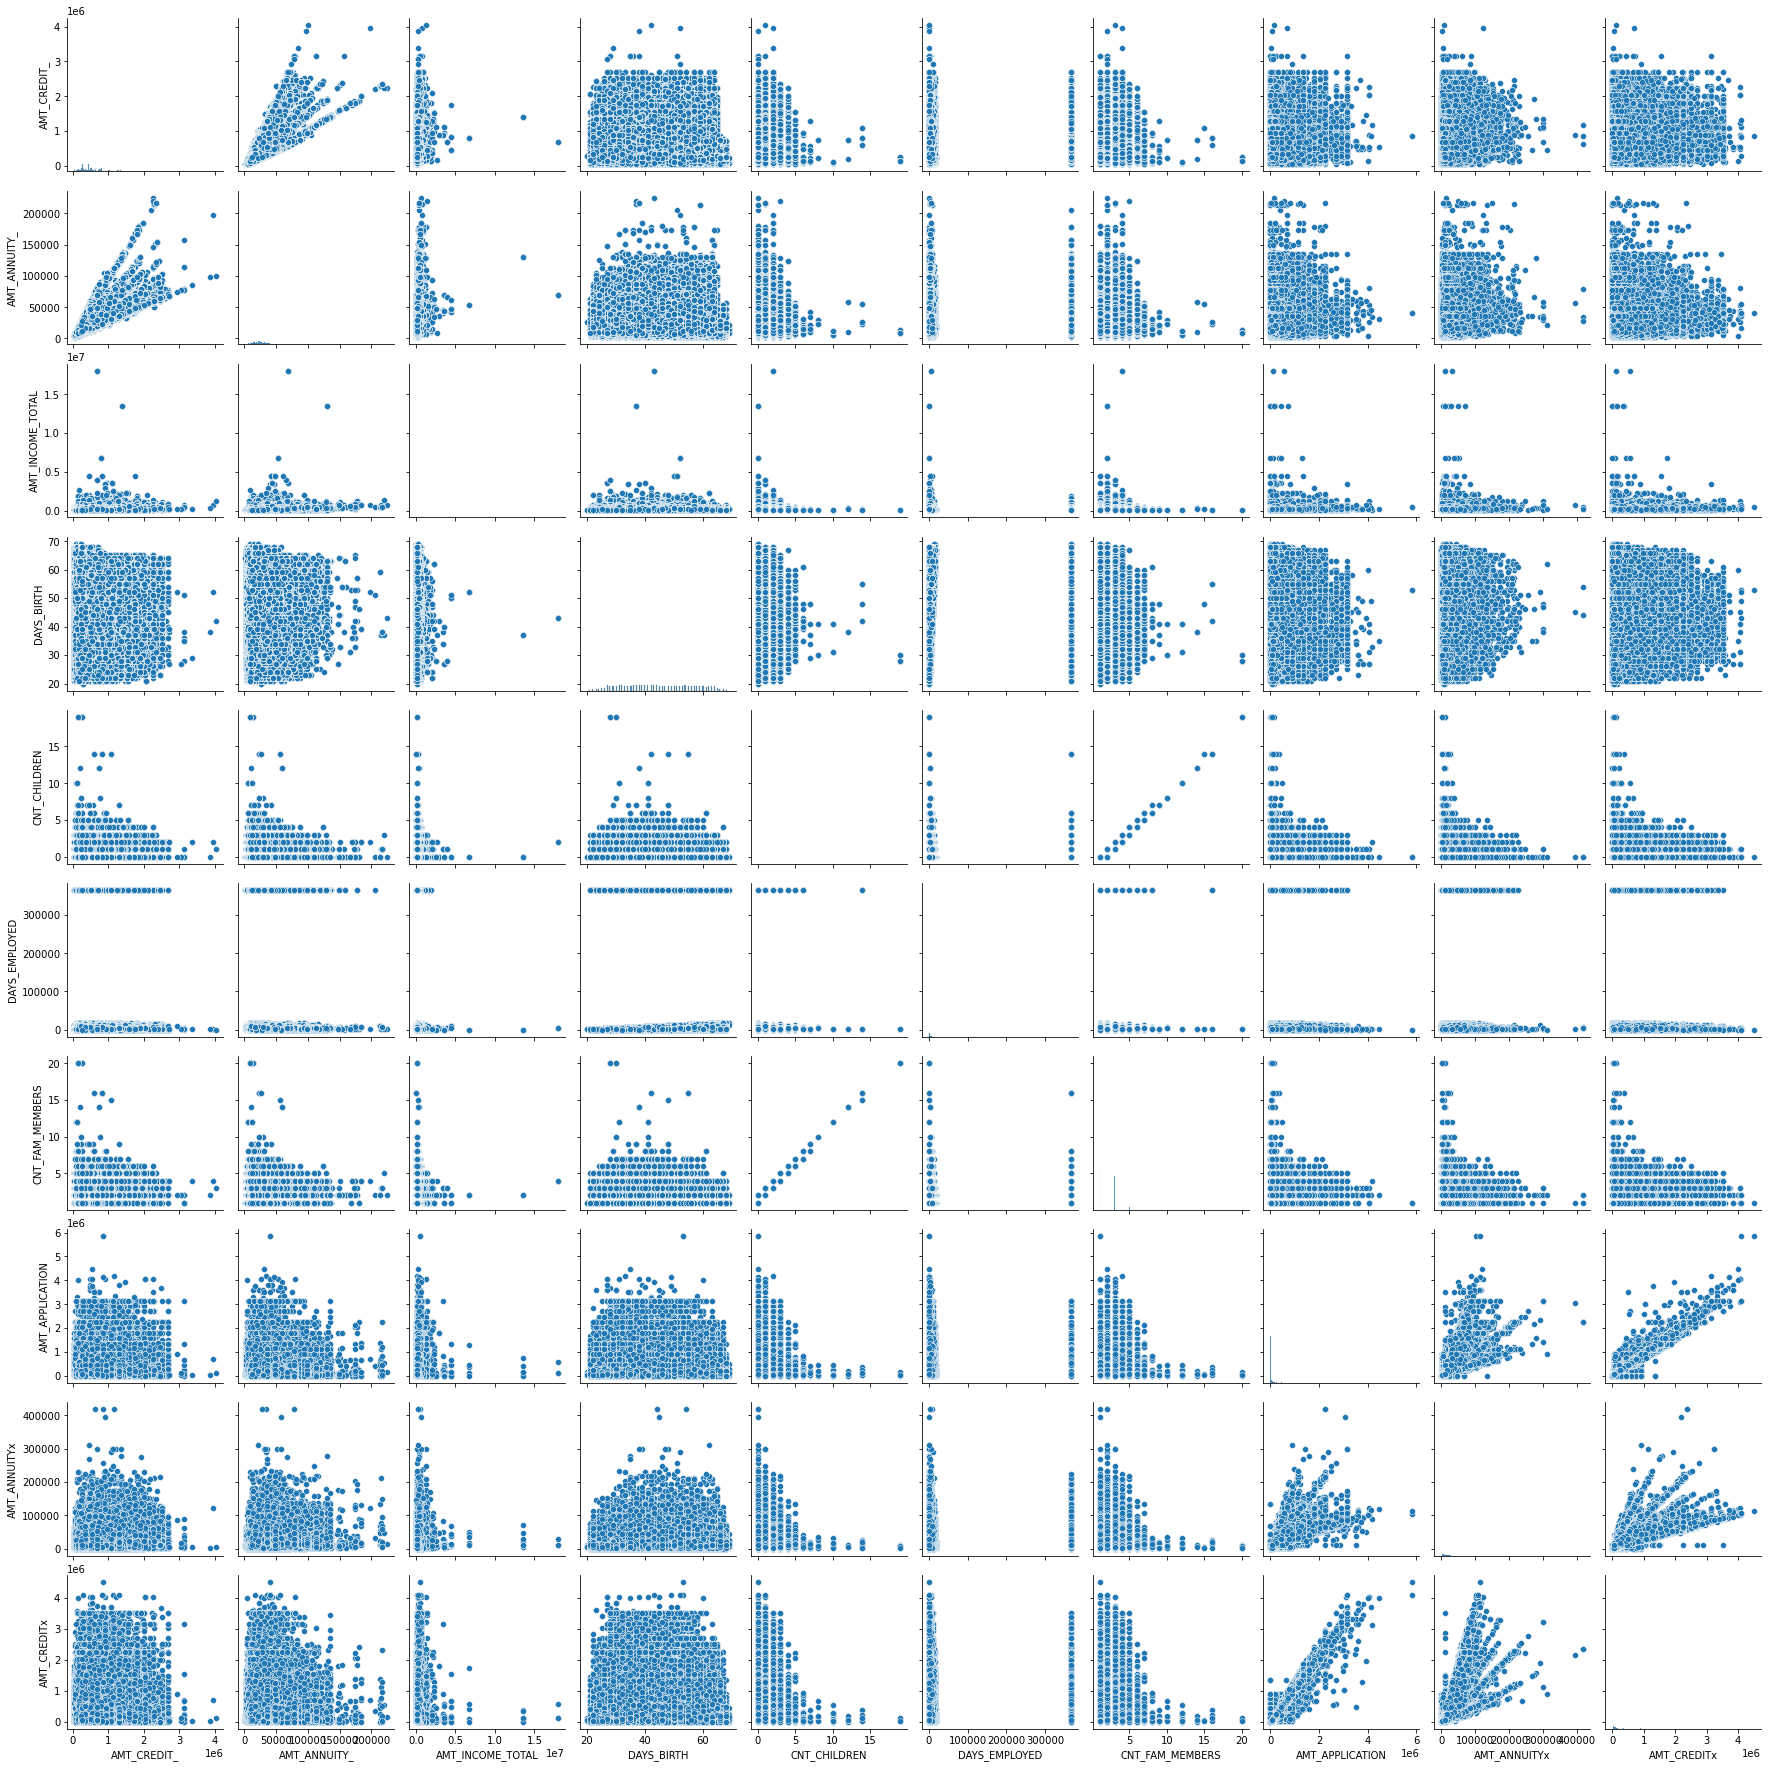

In [308]:
#A pair plot for all numerical variables for Defaulters
pair = Non_Defaulters[['AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_INCOME_TOTAL','DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED','CNT_FAM_MEMBERS','AMT_APPLICATION','AMT_ANNUITYx','AMT_CREDITx']]
sns.pairplot(pair)

plt.show()

**Insight**: Annuity and credit are highly correlated. Except for that there isn't much of a relationship between defaulters variables, the same is true for non-defaulters.

In [309]:
#Function ot plot the heatmap for numerical variables
def plotCorr(data,title):
    plt.figure(figsize=(15, 10))
    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax= sns.heatmap(data, mask=mask,cmap='Reds') 

In [310]:
#Only numerical variables are selected
corr0=Non_Defaulters[['AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_INCOME_TOTAL','DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED','CNT_FAM_MEMBERS','AMT_APPLICATION','AMT_ANNUITYx','AMT_CREDITx']]
corr1=Defaulters[['AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_INCOME_TOTAL','DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED','CNT_FAM_MEMBERS','AMT_APPLICATION','AMT_ANNUITYx','AMT_CREDITx']]

non_defaulters_corr=corr0.corr()   
defaulters_corr=corr1.corr()  

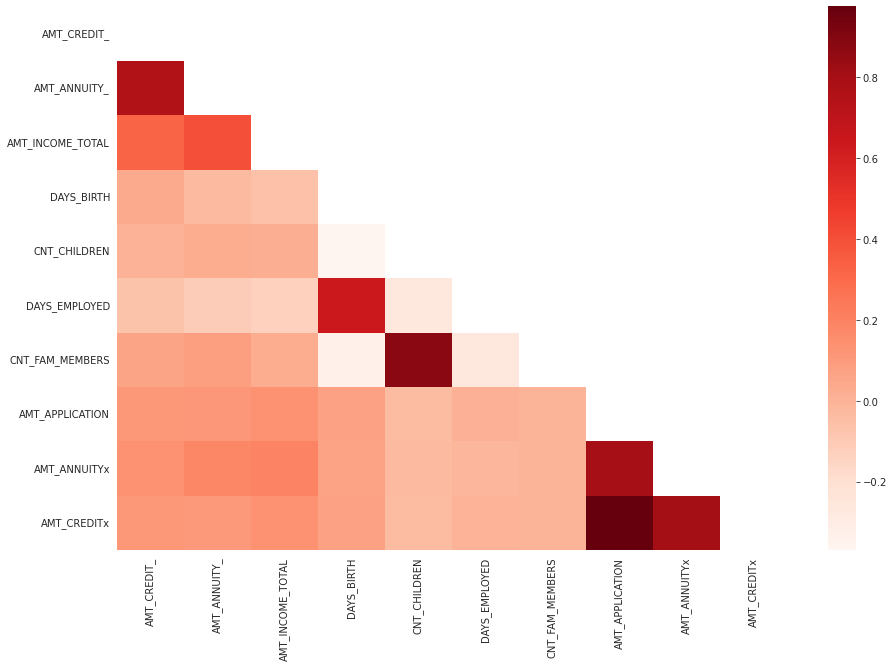

In [311]:
#Ploting a correlation heatmap for defaulters
plotCorr(data=non_defaulters_corr,title='Correlation for Defaulters')

**Insight:** The higher the number of children, the lower the total income.

Top 10 correlation for the Client with payment difficulties

In [312]:
# Top 10 correlation for the Defaulter data
c = defaulters_corr.abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so = so[10::2]
so.head(10)

AMT_APPLICATION  AMT_CREDITx        0.975377
CNT_FAM_MEMBERS  CNT_CHILDREN       0.886300
AMT_CREDITx      AMT_ANNUITYx       0.829385
AMT_APPLICATION  AMT_ANNUITYx       0.816557
AMT_CREDIT_      AMT_ANNUITY_       0.745679
DAYS_BIRTH       DAYS_EMPLOYED      0.587081
CNT_CHILDREN     DAYS_BIRTH         0.295126
CNT_FAM_MEMBERS  DAYS_BIRTH         0.248958
DAYS_EMPLOYED    CNT_FAM_MEMBERS    0.201603
CNT_CHILDREN     DAYS_EMPLOYED      0.201544
dtype: float64

#### Top 10 correlation for the Client with payment difficulties
| Variable 1         |Variable 2       |
|--------------------|-----------------|
| 1. AMT_APPLICATION | AMT_CREDITx     |
| 2. CNT_FAM_MEMBERS | CNT_CHILDREN    |
| 3. AMT_CREDITx     | AMT_ANNUITYx    |
| 4. AMT_APPLICATION | AMT_ANNUITYx    |
| 5. AMT_CREDIT_     | AMT_ANNUITY_    |
| 6. DAYS_BIRTH      | DAYS_EMPLOYED   |
| 7. CNT_CHILDREN    | DAYS_BIRTH      |
| 8. CNT_FAM_MEMBERS | DAYS_BIRTH      |
| 9. DAYS_EMPLOYED   | CNT_FAM_MEMBERS |
| 10. CNT_CHILDREN   | DAYS_EMPLOYED   |

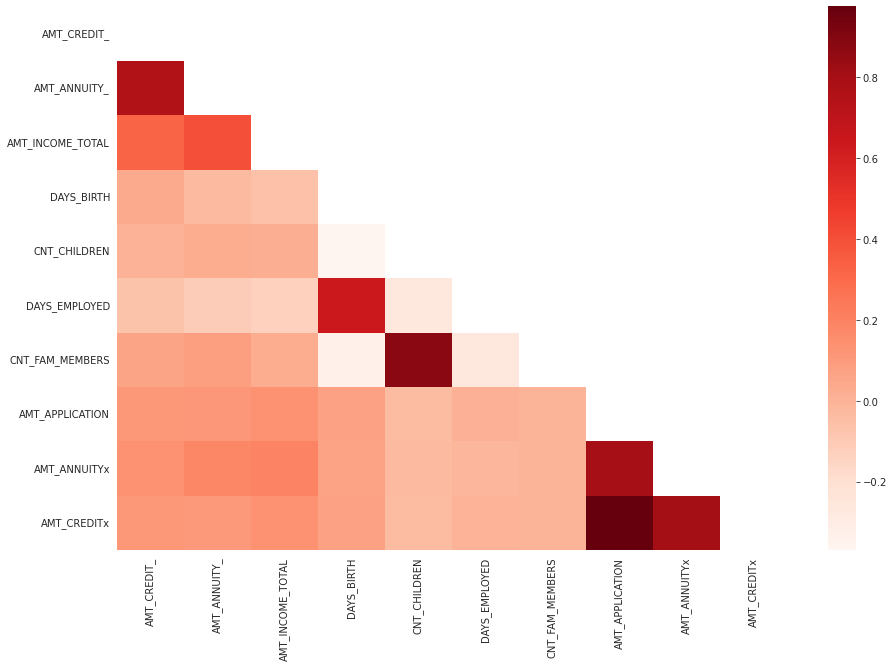

In [313]:
#Ploting a correlation heatmap for non defaulters
plotCorr(data=non_defaulters_corr,title='Correlation for Non Defaulters')

**Insight**: The heatmap is quite similar to that of defaulters.

In [314]:
# Top 10 correlation for the Non-Defaulter data
c = non_defaulters_corr.abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so = so[10::2]
so.head(10)

AMT_CREDITx       AMT_APPLICATION    0.975725
CNT_FAM_MEMBERS   CNT_CHILDREN       0.878474
AMT_ANNUITYx      AMT_CREDITx        0.811974
                  AMT_APPLICATION    0.805867
AMT_ANNUITY_      AMT_CREDIT_        0.759437
DAYS_EMPLOYED     DAYS_BIRTH         0.634997
AMT_INCOME_TOTAL  AMT_ANNUITY_       0.402083
DAYS_BIRTH        CNT_CHILDREN       0.369101
CNT_FAM_MEMBERS   DAYS_BIRTH         0.333394
AMT_INCOME_TOTAL  AMT_CREDIT_        0.324837
dtype: float64

#### Top 10 correlation for the Client with no payment difficulties
| Variable 1         |Variable 2       |
|----------------------|-----------------|
| 1. AMT_APPLICATION   | AMT_CREDITx     |
| 2. CNT_FAM_MEMBERS   | CNT_CHILDREN    |
| 3. AMT_ANNUITYx      | AMT_CREDITx     |
| 4. AMT_ANNUITYx      | AMT_APPLICATION |
| 5. AMT_ANNUITY_      | AMT_CREDIT_     |
| 6. DAYS_EMPLOYED     | DAYS_BIRTH      |
| 7. AMT_INCOME_TOTAL  | AMT_ANNUITY     |
| 8. DAYS_BIRTH        | CNT_CHILDREN    |
| 9. CNT_FAM_MEMBERS   | DAYS_BIRTH      |
| 10. AMT_INCOME_TOTAL | AMT_CREDIT_     |
  

## 6. Conclusion


#### After a series of analysis it is found that these drivers can be used to determine if a client is more likely to default or not

1. If their income type is maternity leave.
2. If their housing type is rented or they are living with their parents
3. If they have more than 8 children or more than 10 family members
4. If they are a teen and have a low income 
5. If their occupation type is a low-skill laborer
6. If they are a male with secondary education

#### On the other hand after a series of analysis it is found that these 5 drivers can be used to determine if a client is less likely to default or not

1. If their income type is student or businessman 
2. If they are older than 50 years but not unemployed 
3. If they have an academic degree
4. If their income is very high ( more than than 600,000 )
5. Clients with a region of rating 1

#### The following are the medium risk clients who can be charged a higher interest rate because of their risk assessement. 

1. Between the ages 30-50 and if they are working, commercial associate or state servant
2. If the client is older than 40 and have a secondary education 
3. A lot of consumer loans are unused hence the reason can be investigated.
4. If the credit amount is high or very high